In [1]:
import nibabel as nib

# Load a NIfTI file
nifti_path = "sub-213/anat/sub-213_acq-a_T1w.nii.gz"
img = nib.load(nifti_path)

# Get the image data as a NumPy array
img_data = img.get_fdata()

# Print shape and visualize
print(f"Image shape: {img_data.shape}")


Image shape: (256, 256, 124)


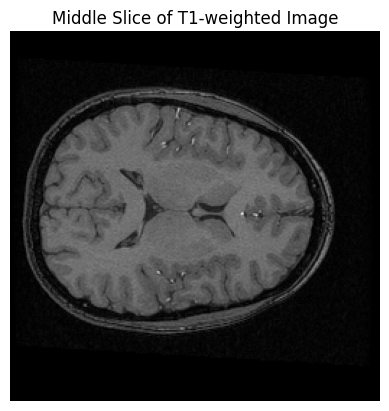

In [2]:
import matplotlib.pyplot as plt

# Visualize a slice
slice_idx = img_data.shape[2] // 2  # Middle slice
plt.imshow(img_data[:, :, slice_idx], cmap="gray")
plt.title("Middle Slice of T1-weighted Image")
plt.axis("off")
plt.show()


In [3]:
import pandas as pd

# Load a TSV file
event_path = "sub-213/func/sub-213_task-Conj19Sel_acq-a_events.tsv"
events = pd.read_csv(event_path, sep="\t")

# Display the first few rows
print(events.head())


    onset  duration  block block_type_intended block_type_performed  \
0    0.00     38.69      1              single               single   
1   38.69     38.87      2               array                array   
2   77.56     38.69      3              single               single   
3  116.25     38.87      4               array                array   
4  155.12     38.69      5              single               single   

   response_time_avg  correct_total  errors_total  false-neg  false-pos  NR  \
0             0.5679           17.0             1        NaN        1.0 NaN   
1             0.6947           18.0             0        NaN        NaN NaN   
2             0.5872           18.0             0        NaN        NaN NaN   
3             0.7014           18.0             0        NaN        NaN NaN   
4             0.5265           18.0             0        NaN        NaN NaN   

   comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [4]:
phenotype_path = "phenotype/dbrs.tsv"
phenotype = pd.read_csv(phenotype_path, sep="\t")

# Explore phenotype data
print(phenotype.head())


  participant_id  item_1  item_2  item_3  item_4  item_5  item_6  item_7  \
0        sub-213     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1        sub-214     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2        sub-218     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        sub-219     3.0     3.0     2.0     3.0     3.0     3.0     3.0   
4        sub-220     1.0     0.0     0.0     0.0     0.0     0.0     1.0   

   item_8  item_9  item_10  item_11  item_12  item_13  item_14  item_15  \
0     NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1     NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2     0.0     0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3     2.0     3.0      3.0      2.0      1.0      3.0      0.0      3.0   
4     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   item_16  item_17  item_18  
0      NaN      NaN      NaN  
1      NaN      NaN      NaN  

In [5]:
from nilearn.image import smooth_img

# Smooth the image
smoothed_img = smooth_img(nifti_path, fwhm=6)  # Full-width half-max smoothing
smoothed_img

In [6]:
# Extract a 2D slice
slice_2d = img_data[:, :, slice_idx]


In [7]:
import numpy as np

# Save a slice as a NumPy array
np.save("slice_213.npy", slice_2d)

# Save behavioral data
events.to_csv("processed_events.csv", index=False)


In [8]:
# Repeat phenotype data to match the number of rows in events
phenotype_values = phenotype_row.iloc[0, 1:].values  # Extract phenotype values
repeated_values = [phenotype_values] * len(events)  # Repeat for each event

# Create a new DataFrame for phenotype data and concatenate
phenotype_df = pd.DataFrame(repeated_values, columns=phenotype.columns[1:])
events_with_phenotype = pd.concat([events, phenotype_df], axis=1)

print(events_with_phenotype.head())


NameError: name 'phenotype_row' is not defined

In [9]:
phenotype_filled = phenotype.fillna(0)  # Replace NaNs with 0
phenotype_row = phenotype_filled[phenotype_filled["participant_id"] == participant_id]

# Repeat and assign as before
phenotype_values = phenotype_row.iloc[0, 1:].values
repeated_values = [phenotype_values] * len(events)
phenotype_df = pd.DataFrame(repeated_values, columns=phenotype.columns[1:])
events_with_phenotype = pd.concat([events, phenotype_df], axis=1)


NameError: name 'participant_id' is not defined

In [10]:
phenotype_row = phenotype[phenotype["participant_id"] == participant_id].dropna()

if phenotype_row.empty:
    print(f"No phenotype data available for {participant_id}")
else:
    phenotype_values = phenotype_row.iloc[0, 1:].values
    repeated_values = [phenotype_values] * len(events)
    phenotype_df = pd.DataFrame(repeated_values, columns=phenotype.columns[1:])
    events_with_phenotype = pd.concat([events, phenotype_df], axis=1)


NameError: name 'participant_id' is not defined

In [11]:
print(phenotype.head())
print(phenotype[phenotype["participant_id"] == "sub-213"])
print(phenotype.isna().sum())  # Count of NaNs in each column


  participant_id  item_1  item_2  item_3  item_4  item_5  item_6  item_7  \
0        sub-213     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1        sub-214     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2        sub-218     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        sub-219     3.0     3.0     2.0     3.0     3.0     3.0     3.0   
4        sub-220     1.0     0.0     0.0     0.0     0.0     0.0     1.0   

   item_8  item_9  item_10  item_11  item_12  item_13  item_14  item_15  \
0     NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1     NaN     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2     0.0     0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3     2.0     3.0      3.0      2.0      1.0      3.0      0.0      3.0   
4     0.0     0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   item_16  item_17  item_18  
0      NaN      NaN      NaN  
1      NaN      NaN      NaN  

In [12]:
import numpy as np

# Select slices for a participant
slices = [img_data[:, :, i] for i in range(img_data.shape[2])]

# Normalize slice intensity for ML input
normalized_slices = [slice_ / np.max(slice_) for slice_ in slices]


In [13]:
np.save(f"{participant_id}_slices.npy", normalized_slices)


NameError: name 'participant_id' is not defined

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Placeholder data
X = np.random.rand(100, 5000)  # Features (e.g., flattened slices)
y = np.random.randint(0, 2, 100)  # Labels (0: control, 1: ADHD)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")


Accuracy: 0.55


In [15]:
print(f"Shape of functional data: {func_data.shape}")


NameError: name 'func_data' is not defined

In [16]:
# Use valid voxel indices based on data shape
valid_x, valid_y, valid_z = 32, 32, 18  # Example: center of the volume

voxel_time_series = func_data[valid_x, valid_y, valid_z, :]
plt.plot(voxel_time_series)
plt.title("Voxel Time Series")
plt.xlabel("Time")
plt.ylabel("Signal Intensity")
plt.show()


NameError: name 'func_data' is not defined

In [17]:
# Automatically compute center voxel
center_voxel = tuple(dim // 2 for dim in func_data.shape[:3])

# Extract time series for the center voxel
voxel_time_series = func_data[center_voxel[0], center_voxel[1], center_voxel[2], :]
print(f"Time series at center voxel {center_voxel}: {voxel_time_series}")


NameError: name 'func_data' is not defined

In [18]:
print(f"Data dimensions: {func_data.ndim}")


NameError: name 'func_data' is not defined

BELOW STARTS ANOTHER EXPERIEMENT

In [20]:
import os
def process_subject(subject_id):
    # Define paths for anatomical and functional MRI data
    anat_path = f"sub-{subject_id}/anat/sub-{subject_id}_acq-a_T1w.nii.gz"
    func_path = f"sub-{subject_id}/func/sub-{subject_id}_task-Conj19Sel_acq-a_bold.nii.gz"
    events_path = f"sub-{subject_id}/func/sub-{subject_id}_task-Conj19Sel_acq-a_events.tsv"
    
    # Check if the anatomical file exists
    if os.path.exists(anat_path):
        # Load anatomical MRI data (example)
        anat_image = nib.load(anat_path)
        anat_data = anat_image.get_fdata()
        
        # Extract features from the anatomical data (e.g., mean intensity)
        mean_intensity = np.mean(anat_data)
    else:
        print(f"Anatomical file {anat_path} does not exist.")
        # If the anatomical file does not exist, return empty or default values
        mean_intensity = None
    
    # Load event data (task labels)
    if os.path.exists(events_path):
        events_data = pd.read_csv(events_path, sep='\t')
        events_data['task_label'] = events_data['trial_type']  # Task labels from events
        labels = events_data['task_label'].values[0]  # This can be adjusted based on your needs
    else:
        print(f"Event file {events_path} does not exist.")
        labels = None
    
    # Create feature vector for the subject (e.g., using only mean intensity for simplicity)
    # Ensure mean_intensity is not None before using it
    if mean_intensity is not None and labels is not None:
        features = [mean_intensity]
        return features, labels
    else:
        # Skip this subject if necessary files are missing
        return None, None

# Loop through all subjects and process their data
subject_ids = ['001', '002', '003', '004']  # Example subject IDs
all_features = []
all_labels = []

# Process each subject
for subject_id in subject_ids:
    features, labels = process_subject(subject_id)
    if features is not None and labels is not None:
        all_features.append(features)
        all_labels.append(labels)

# Convert features and labels to numpy arrays (check if we have data)
if all_features and all_labels:
    X = np.array(all_features)
    y = np.array(all_labels)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Classifier model (e.g., RandomForest)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = clf.predict(X_test)

    # Model evaluation
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Confusion matrix plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
else:
    print("No valid data to train the model.")


Anatomical file sub-001/anat/sub-001_acq-a_T1w.nii.gz does not exist.
Event file sub-001/func/sub-001_task-Conj19Sel_acq-a_events.tsv does not exist.
Anatomical file sub-002/anat/sub-002_acq-a_T1w.nii.gz does not exist.
Event file sub-002/func/sub-002_task-Conj19Sel_acq-a_events.tsv does not exist.
Anatomical file sub-003/anat/sub-003_acq-a_T1w.nii.gz does not exist.
Event file sub-003/func/sub-003_task-Conj19Sel_acq-a_events.tsv does not exist.
Anatomical file sub-004/anat/sub-004_acq-a_T1w.nii.gz does not exist.
Event file sub-004/func/sub-004_task-Conj19Sel_acq-a_events.tsv does not exist.
No valid data to train the model.


In [21]:
def process_subject(subject_id):
    # Define paths for anatomical and functional MRI data
    anat_path = f"sub-{subject_id}/anat/sub-{subject_id}_acq-a_T1w.nii.gz"
    func_path = f"sub-{subject_id}/func/sub-{subject_id}_task-Conj19Sel_acq-a_bold.nii.gz"
    events_path = f"sub-{subject_id}/func/sub-{subject_id}_task-Conj19Sel_acq-a_events.tsv"
    
    # Print paths for debugging
    print(f"Checking paths for subject {subject_id}:")
    print(f"Anatomical: {anat_path}")
    print(f"Functional: {func_path}")
    print(f"Events: {events_path}")
    
    # Check if the anatomical file exists
    if os.path.exists(anat_path):
        # Load anatomical MRI data (example)
        anat_image = nib.load(anat_path)
        anat_data = anat_image.get_fdata()
        
        # Extract features from the anatomical data (e.g., mean intensity)
        mean_intensity = np.mean(anat_data)
    else:
        print(f"Anatomical file {anat_path} does not exist.")
        # If the anatomical file does not exist, return empty or default values
        mean_intensity = None
    
    # Load event data (task labels)
    if os.path.exists(events_path):
        events_data = pd.read_csv(events_path, sep='\t')
        events_data['task_label'] = events_data['trial_type']  # Task labels from events
        labels = events_data['task_label'].values[0]  # This can be adjusted based on your needs
    else:
        print(f"Event file {events_path} does not exist.")
        labels = None
    
    # Create feature vector for the subject (e.g., using only mean intensity for simplicity)
    # Ensure mean_intensity is not None before using it
    if mean_intensity is not None and labels is not None:
        features = [mean_intensity]
        return features, labels
    else:
        # Skip this subject if necessary files are missing
        return None, None
    

# Loop through all subjects and process their data
subject_ids = ['001', '002', '003', '004']  # Example subject IDs
all_features = []
all_labels = []

# Process each subject
for subject_id in subject_ids:
    features, labels = process_subject(subject_id)
    if features is not None and labels is not None:
        all_features.append(features)
        all_labels.append(labels)

# Convert features and labels to numpy arrays (check if we have data)
if all_features and all_labels:
    X = np.array(all_features)
    y = np.array(all_labels)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Classifier model (e.g., RandomForest)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = clf.predict(X_test)

    # Model evaluation
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Confusion matrix plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
else:
    print("No valid data to train the model.")



Checking paths for subject 001:
Anatomical: sub-001/anat/sub-001_acq-a_T1w.nii.gz
Functional: sub-001/func/sub-001_task-Conj19Sel_acq-a_bold.nii.gz
Events: sub-001/func/sub-001_task-Conj19Sel_acq-a_events.tsv
Anatomical file sub-001/anat/sub-001_acq-a_T1w.nii.gz does not exist.
Event file sub-001/func/sub-001_task-Conj19Sel_acq-a_events.tsv does not exist.
Checking paths for subject 002:
Anatomical: sub-002/anat/sub-002_acq-a_T1w.nii.gz
Functional: sub-002/func/sub-002_task-Conj19Sel_acq-a_bold.nii.gz
Events: sub-002/func/sub-002_task-Conj19Sel_acq-a_events.tsv
Anatomical file sub-002/anat/sub-002_acq-a_T1w.nii.gz does not exist.
Event file sub-002/func/sub-002_task-Conj19Sel_acq-a_events.tsv does not exist.
Checking paths for subject 003:
Anatomical: sub-003/anat/sub-003_acq-a_T1w.nii.gz
Functional: sub-003/func/sub-003_task-Conj19Sel_acq-a_bold.nii.gz
Events: sub-003/func/sub-003_task-Conj19Sel_acq-a_events.tsv
Anatomical file sub-003/anat/sub-003_acq-a_T1w.nii.gz does not exist.
Eve

In [22]:
import os

# Define the subjects and their respective file paths
subjects = ['001', '002', '003', '004']  # Add more subjects as needed

for subject in subjects:
    anatomical_path = f"sub-{subject}/anat/sub-{subject}_acq-a_T1w.nii.gz"
    functional_path = f"sub-{subject}/func/sub-{subject}_task-Conj19Sel_acq-a_bold.nii.gz"
    events_path = f"sub-{subject}/func/sub-{subject}_task-Conj19Sel_acq-a_events.tsv"

    # Check if anatomical file exists
    if os.path.exists(anatomical_path):
        print(f"Anatomical file sub-{subject}/anat/sub-{subject}_acq-a_T1w.nii.gz exists.")
    else:
        print(f"Anatomical file sub-{subject}/anat/sub-{subject}_acq-a_T1w.nii.gz does not exist.")
    
    # Check if functional file exists
    if os.path.exists(functional_path):
        print(f"Functional file sub-{subject}/func/sub-{subject}_task-Conj19Sel_acq-a_bold.nii.gz exists.")
    else:
        print(f"Functional file sub-{subject}/func/sub-{subject}_task-Conj19Sel_acq-a_bold.nii.gz does not exist.")
    
    # Check if event file exists
    if os.path.exists(events_path):
        print(f"Event file sub-{subject}/func/sub-{subject}_task-Conj19Sel_acq-a_events.tsv exists.")
    else:
        print(f"Event file sub-{subject}/func/sub-{subject}_task-Conj19Sel_acq-a_events.tsv does not exist.")

    print("-" * 40)  # Separator for clarity

# After checking all subjects, determine if all required files exist
missing_files = False
for subject in subjects:
    anatomical_path = f"sub-{subject}/anat/sub-{subject}_acq-a_T1w.nii.gz"
    events_path = f"sub-{subject}/func/sub-{subject}_task-Conj19Sel_acq-a_events.tsv"
    
    if not os.path.exists(anatomical_path) or not os.path.exists(events_path):
        missing_files = True
        break

if missing_files:
    print("No valid data to train the model.")
else:
    print("All required files are present. Ready to train the model.")


Anatomical file sub-001/anat/sub-001_acq-a_T1w.nii.gz does not exist.
Functional file sub-001/func/sub-001_task-Conj19Sel_acq-a_bold.nii.gz does not exist.
Event file sub-001/func/sub-001_task-Conj19Sel_acq-a_events.tsv does not exist.
----------------------------------------
Anatomical file sub-002/anat/sub-002_acq-a_T1w.nii.gz does not exist.
Functional file sub-002/func/sub-002_task-Conj19Sel_acq-a_bold.nii.gz does not exist.
Event file sub-002/func/sub-002_task-Conj19Sel_acq-a_events.tsv does not exist.
----------------------------------------
Anatomical file sub-003/anat/sub-003_acq-a_T1w.nii.gz does not exist.
Functional file sub-003/func/sub-003_task-Conj19Sel_acq-a_bold.nii.gz does not exist.
Event file sub-003/func/sub-003_task-Conj19Sel_acq-a_events.tsv does not exist.
----------------------------------------
Anatomical file sub-004/anat/sub-004_acq-a_T1w.nii.gz does not exist.
Functional file sub-004/func/sub-004_task-Conj19Sel_acq-a_bold.nii.gz does not exist.
Event file su

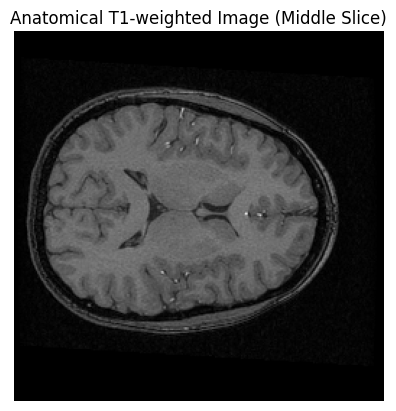

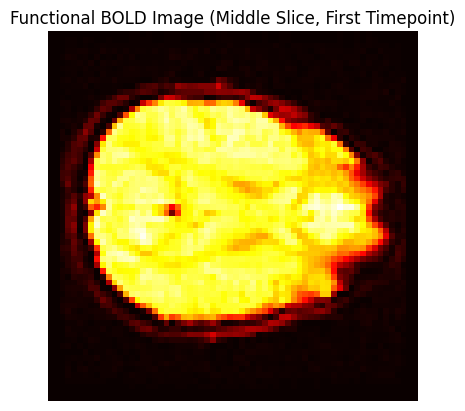

In [23]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load an example anatomical T1w file
anat_file = "./sub-213/anat/sub-213_acq-a_T1w.nii.gz"
anat_img = nib.load(anat_file)
anat_data = anat_img.get_fdata()

# Load an example functional BOLD file
func_file = "./sub-213/func/sub-213_task-Conj19Sel_acq-a_bold.nii.gz"
func_img = nib.load(func_file)
func_data = func_img.get_fdata()

# Display a middle slice of the anatomical image
slice_idx = anat_data.shape[2] // 2  # Middle slice along z-axis
plt.imshow(anat_data[:, :, slice_idx], cmap="gray")
plt.title("Anatomical T1-weighted Image (Middle Slice)")
plt.axis("off")
plt.show()

# Display a middle slice of the functional BOLD image
bold_slice_idx = func_data.shape[2] // 2  # Middle slice
plt.imshow(func_data[:, :, bold_slice_idx, 0], cmap="hot")  # Display the first timepoint
plt.title("Functional BOLD Image (Middle Slice, First Timepoint)")
plt.axis("off")
plt.show()


In [24]:
import os

# Define directories
anat_dir = "./sub-213/anat"
func_dir = "./sub-213/func"

# Process anatomical images
for anat_file in os.listdir(anat_dir):
    if anat_file.endswith(".nii.gz"):
        anat_img = nib.load(os.path.join(anat_dir, anat_file))
        print(f"Loaded anatomical image: {anat_file}")

# Process functional images
for func_file in os.listdir(func_dir):
    if func_file.endswith("_bold.nii.gz"):
        func_img = nib.load(os.path.join(func_dir, func_file))
        print(f"Loaded functional image: {func_file}")


Loaded anatomical image: sub-213_acq-a_T1w.nii.gz
Loaded anatomical image: sub-213_acq-b_T1w.nii.gz
Loaded functional image: sub-213_task-Feat1Inh_acq-b_bold.nii.gz
Loaded functional image: sub-213_task-Feat19Sel_acq-b_bold.nii.gz
Loaded functional image: sub-213_task-Conj9Inh_acq-a_bold.nii.gz
Loaded functional image: sub-213_task-Feat9Inh_acq-b_bold.nii.gz
Loaded functional image: sub-213_task-Conj1Inh_acq-a_bold.nii.gz
Loaded functional image: sub-213_task-Conj19Sel_acq-a_bold.nii.gz


WORKING CODE --------------------------------------->

Visualizing anatomical image: sub-213_acq-a_T1w.nii.gz


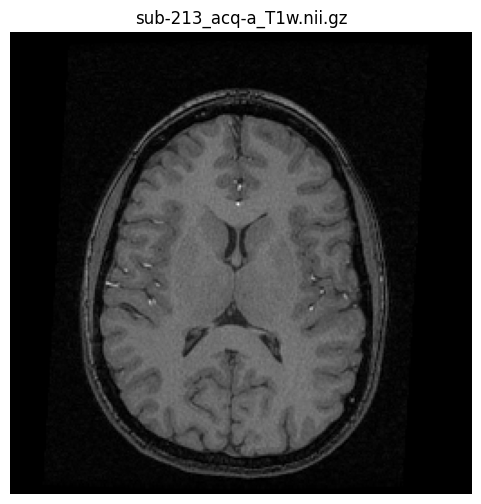

Visualizing anatomical image: sub-213_acq-b_T1w.nii.gz


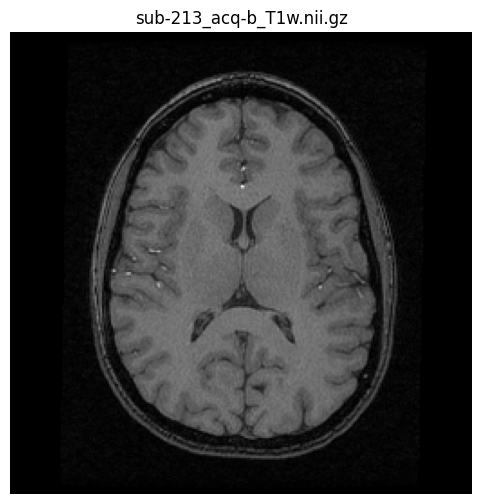

Visualizing functional image: sub-213_task-Feat1Inh_acq-b_bold.nii.gz


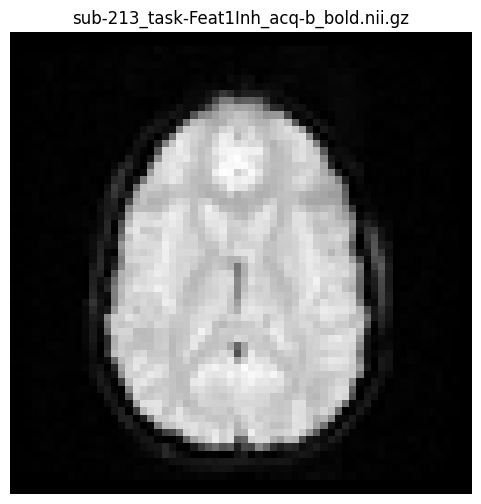

Visualizing functional image: sub-213_task-Feat19Sel_acq-b_bold.nii.gz


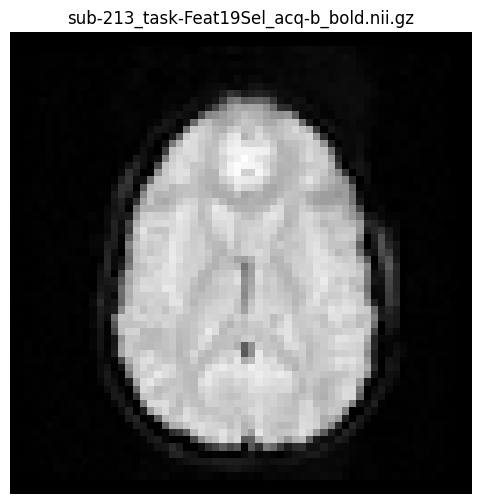

Visualizing functional image: sub-213_task-Conj9Inh_acq-a_bold.nii.gz


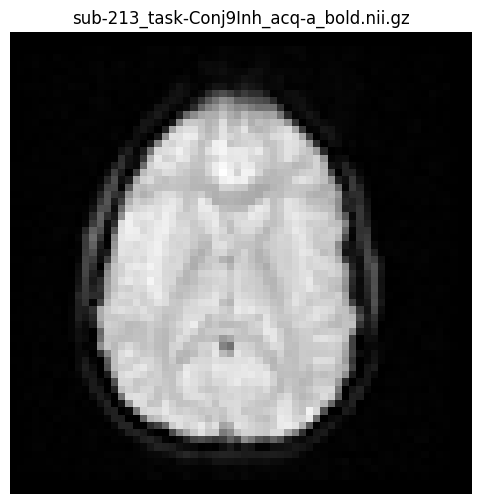

Visualizing functional image: sub-213_task-Feat9Inh_acq-b_bold.nii.gz


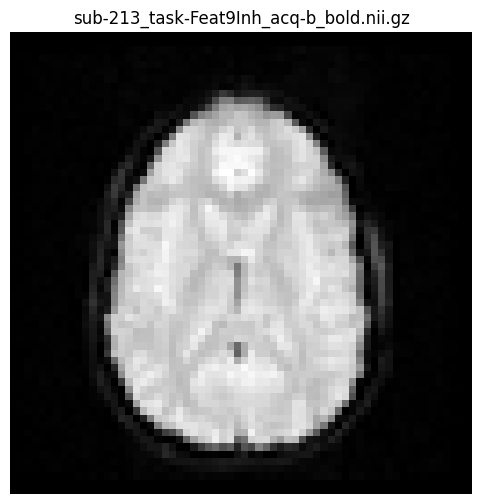

Visualizing functional image: sub-213_task-Conj1Inh_acq-a_bold.nii.gz


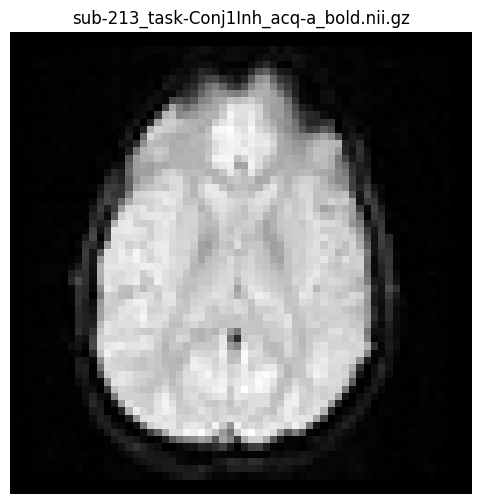

Visualizing functional image: sub-213_task-Conj19Sel_acq-a_bold.nii.gz


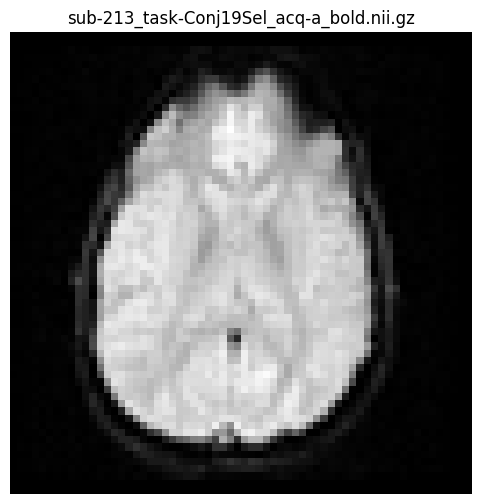

In [25]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

# Directories
anat_dir = "./sub-213/anat"
func_dir = "./sub-213/func"

# Function to display a slice from a NIfTI image
def display_image(img_path, title, slice_axis=2, slice_idx=None, timepoint=None):
    img = nib.load(img_path)
    data = img.get_fdata()
    
    # Check if the image is 4D (functional)
    if data.ndim == 4:
        if timepoint is None:
            timepoint = data.shape[3] // 2  # Default to middle timepoint
        data = data[:, :, :, timepoint]  # Extract the slice from the selected timepoint

    # Determine slice index (default: middle slice along the specified axis)
    if slice_idx is None:
        slice_idx = data.shape[slice_axis] // 2

    # Extract the slice
    if slice_axis == 0:
        slice_data = data[slice_idx, :, :]
    elif slice_axis == 1:
        slice_data = data[:, slice_idx, :]
    else:  # Default to axis 2 (axial view)
        slice_data = data[:, :, slice_idx]
    
    # Display the image slice
    plt.figure(figsize=(6, 6))
    plt.imshow(np.rot90(slice_data), cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Visualize anatomical images
for anat_file in os.listdir(anat_dir):
    if anat_file.endswith(".nii.gz"):
        anat_path = os.path.join(anat_dir, anat_file)
        print(f"Visualizing anatomical image: {anat_file}")
        display_image(anat_path, title=anat_file)

# Visualize functional images
for func_file in os.listdir(func_dir):
    if func_file.endswith("_bold.nii.gz"):
        func_path = os.path.join(func_dir, func_file)
        print(f"Visualizing functional image: {func_file}")
        display_image(func_path, title=func_file, slice_axis=2, timepoint=0)  # Choose the first timepoint as an example


In [26]:
import pandas as pd

# Path to your TSV file (adjust the path if needed)
tsv_path = 'participants.tsv'

# Read the TSV file
df = pd.read_csv(tsv_path, sep='\t')

# Inspect the first few rows of the TSV file
print(df.head())

# Now you can explore the contents, for example:
# 1. Check the columns in the file
print(f"Columns in the TSV file: {df.columns.tolist()}")

# 2. Get information about a specific participant (e.g., sub-213)
participant_info = df[df['participant_id'] == 'sub-213']
print(participant_info)

# 3. Get statistics or summarize key information from the file
print(f"Summary statistics:\n{df.describe()}")

# If you want to compare image metadata with the TSV data, you can access specific columns from the TSV file.


  participant_id birthdate_shifted  sex  adhd  handedness      a_date  \
0        sub-213        1779-05-21    2     0        80.0  1800-05-13   
1        sub-214        1776-11-06    2     0        95.0  1800-05-15   
2        sub-218        1789-07-14    1     0       -90.0  1800-08-20   
3        sub-219        1790-02-14    1     1        90.0  1801-01-30   
4        sub-220        1789-10-18    1     0        90.0  1801-04-20   

       b_date  
0  1801-03-08  
1         NaN  
2  1800-09-10  
3  1801-02-06  
4  1801-08-24  
Columns in the TSV file: ['participant_id', 'birthdate_shifted', 'sex', 'adhd', 'handedness', 'a_date', 'b_date']
  participant_id birthdate_shifted  sex  adhd  handedness      a_date  \
0        sub-213        1779-05-21    2     0        80.0  1800-05-13   

       b_date  
0  1801-03-08  
Summary statistics:
             sex       adhd  handedness
count  38.000000  38.000000   37.000000
mean    1.552632   0.315789   75.270270
std     0.503897   0.471069   41

#### Read all images iteratevily ( anatomical and funcitonal )

Processing subject: sub-221
Visualizing anatomical image: sub-221_acq-b_T1w.nii.gz


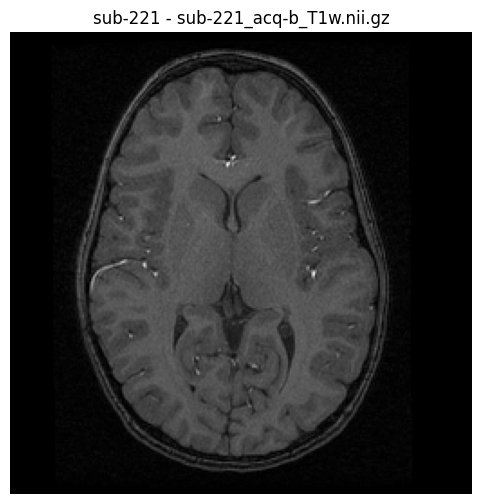

Visualizing anatomical image: sub-221_acq-a_T1w.nii.gz


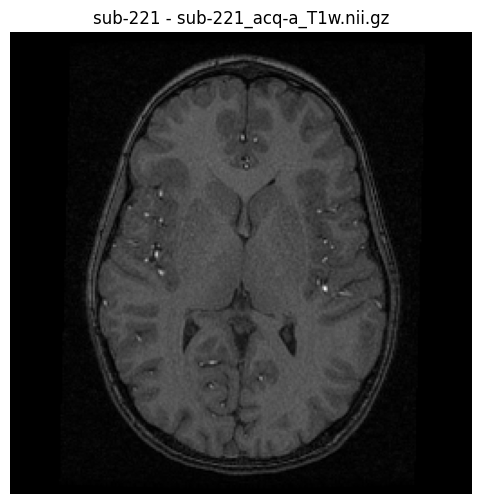

Visualizing functional image: sub-221_task-Feat1Inh_acq-a_bold.nii.gz


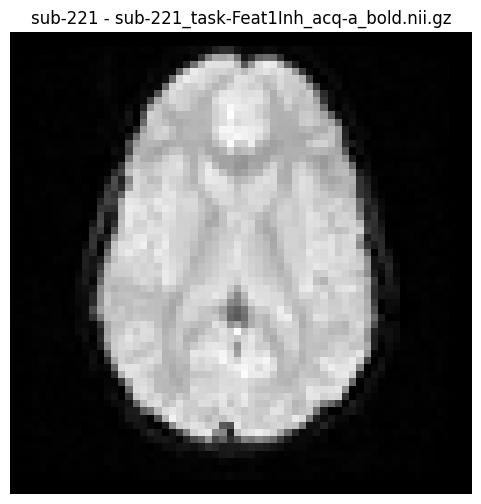

Visualizing functional image: sub-221_task-Conj19Sel_acq-b_bold.nii.gz


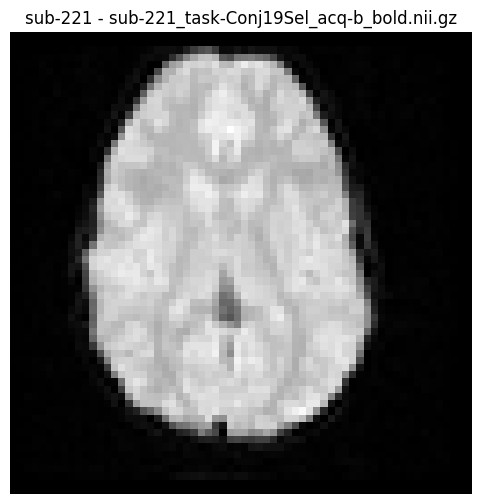

Visualizing functional image: sub-221_task-Conj9Inh_acq-b_bold.nii.gz


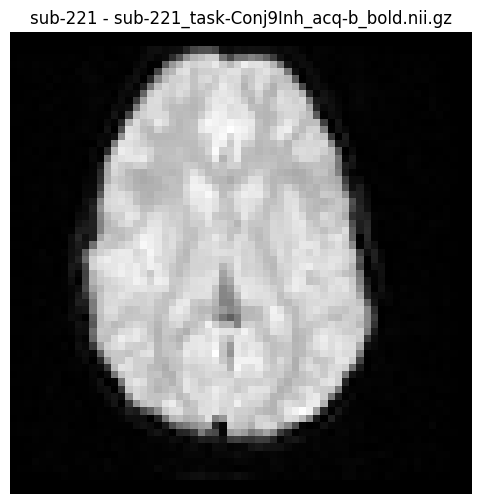

Visualizing functional image: sub-221_task-Feat19Sel_acq-a_bold.nii.gz


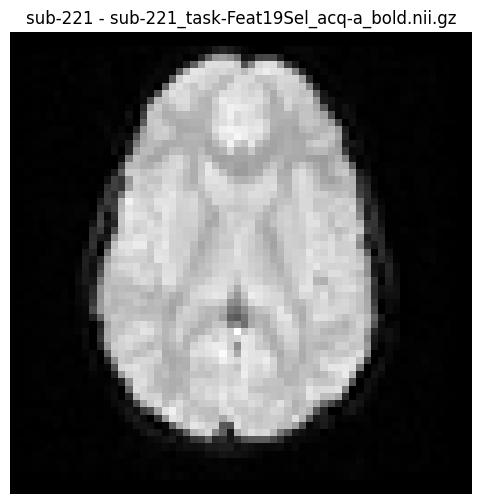

Visualizing functional image: sub-221_task-Feat9Inh_acq-a_bold.nii.gz


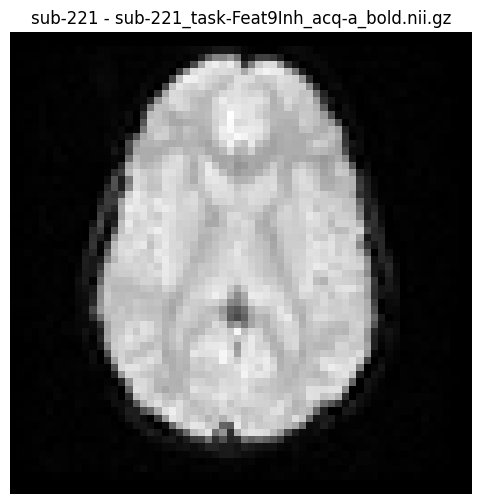

Visualizing functional image: sub-221_task-Conj1Inh_acq-b_bold.nii.gz


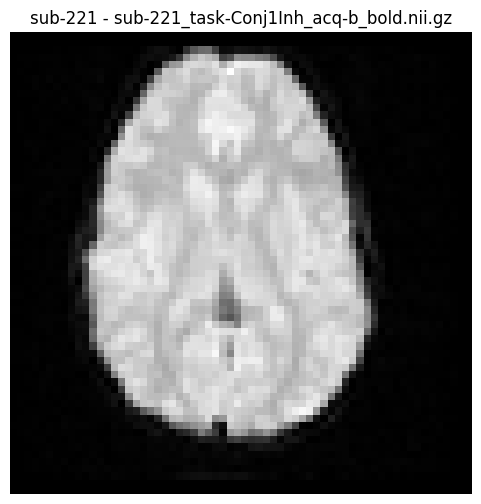

Processing subject: sub-223
Visualizing anatomical image: sub-223_acq-a_T1w.nii.gz


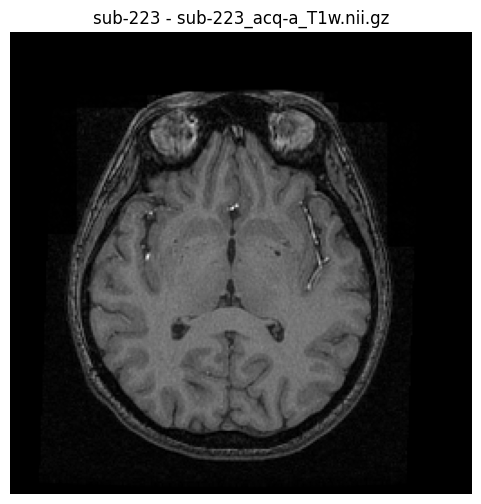

Visualizing functional image: sub-223_task-Feat9Inh_acq-a_bold.nii.gz


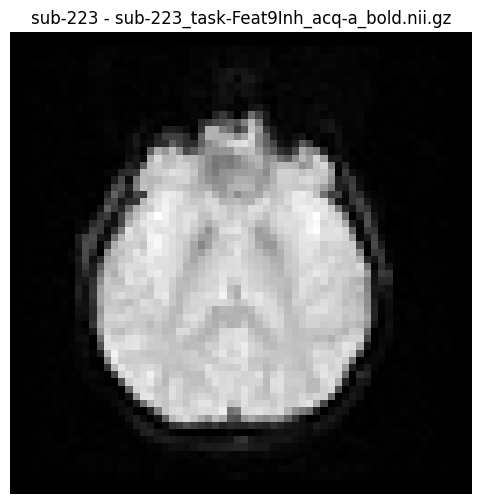

Visualizing functional image: sub-223_task-Feat19Sel_acq-a_bold.nii.gz


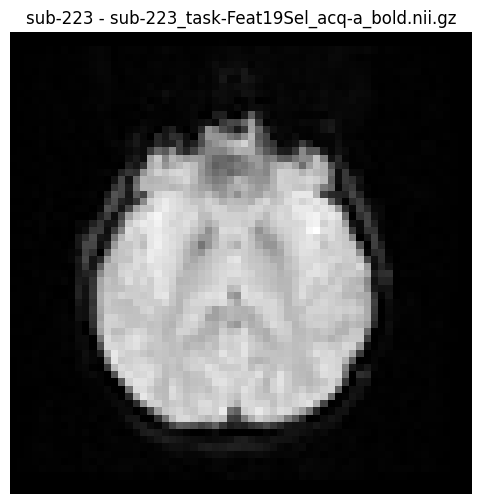

Visualizing functional image: sub-223_task-Conj9Inh_acq-a_bold.nii.gz


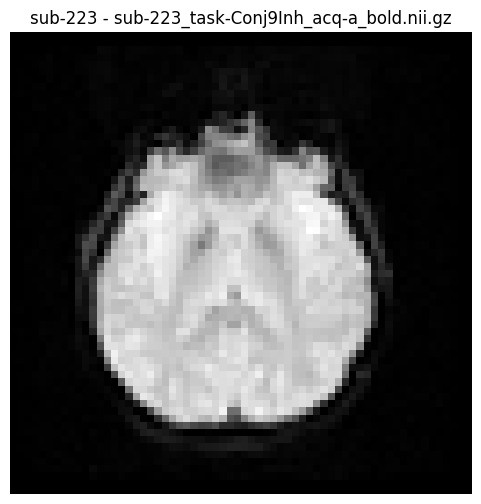

Visualizing functional image: sub-223_task-Conj19Sel_acq-a_bold.nii.gz


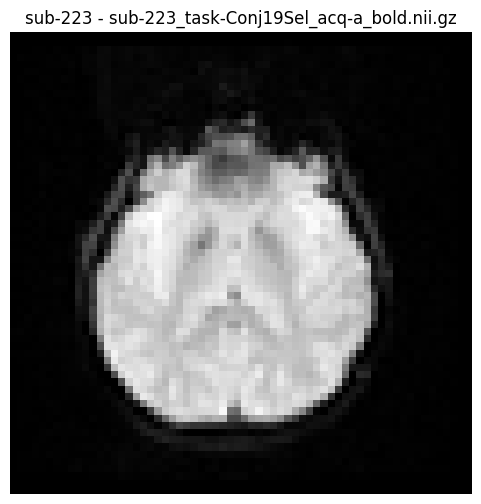

Visualizing functional image: sub-223_task-Feat1Inh_acq-a_bold.nii.gz


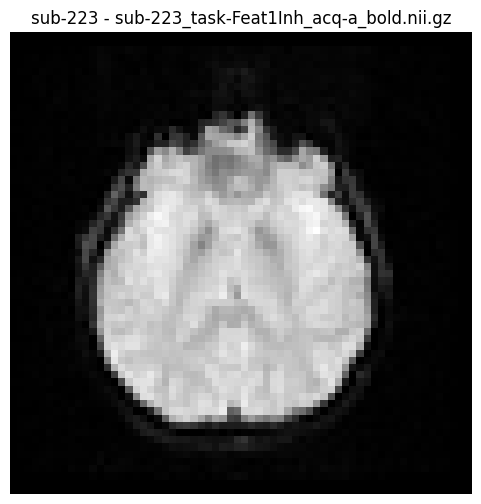

Visualizing functional image: sub-223_task-Conj1Inh_acq-a_bold.nii.gz


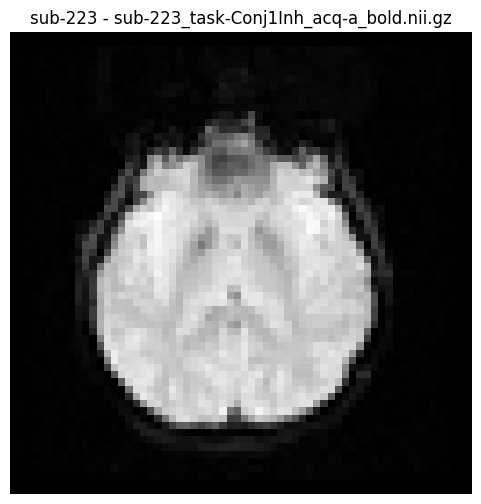

Processing subject: sub-229
Visualizing anatomical image: sub-229_acq-b_T1w.nii.gz


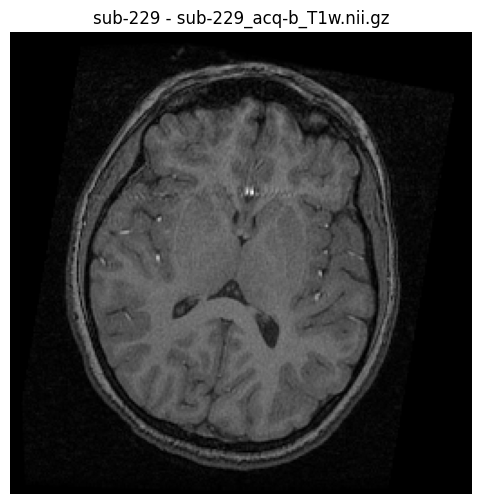

Visualizing anatomical image: sub-229_acq-a_T1w.nii.gz


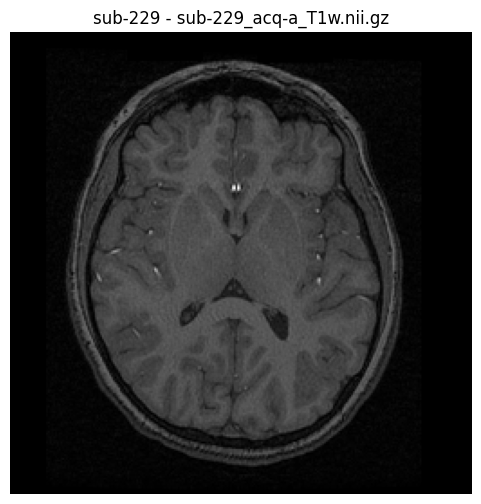

Visualizing functional image: sub-229_task-Feat1Inh_acq-a_bold.nii.gz


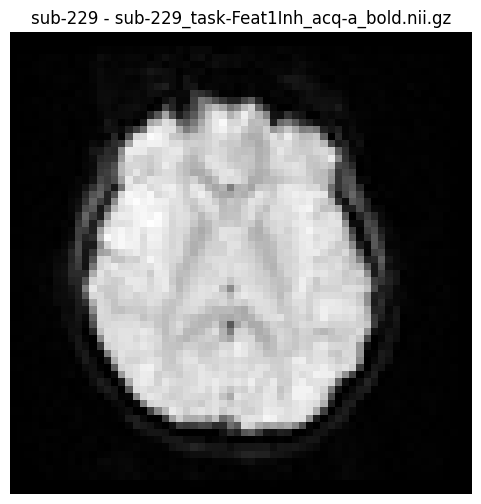

Visualizing functional image: sub-229_task-Feat19Sel_acq-a_bold.nii.gz


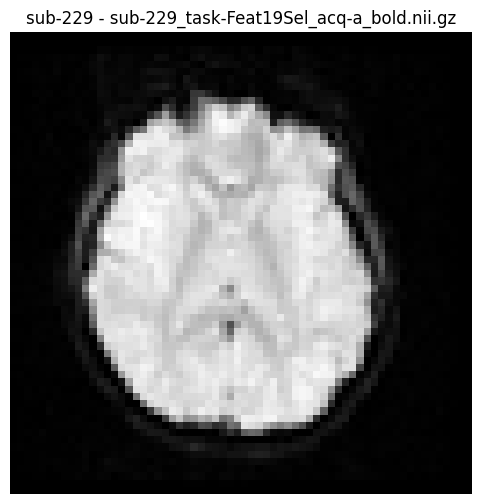

Visualizing functional image: sub-229_task-Feat9Inh_acq-a_bold.nii.gz


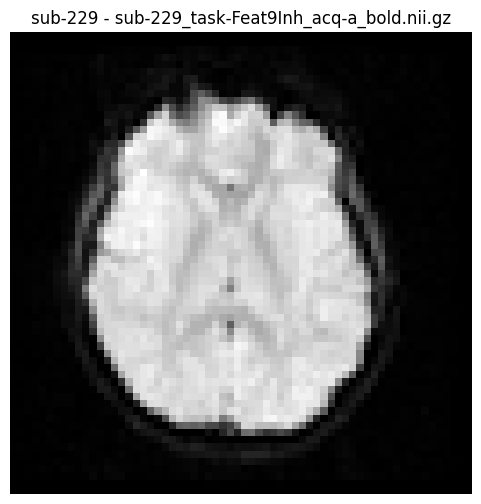

Visualizing functional image: sub-229_task-Conj1Inh_acq-b_bold.nii.gz


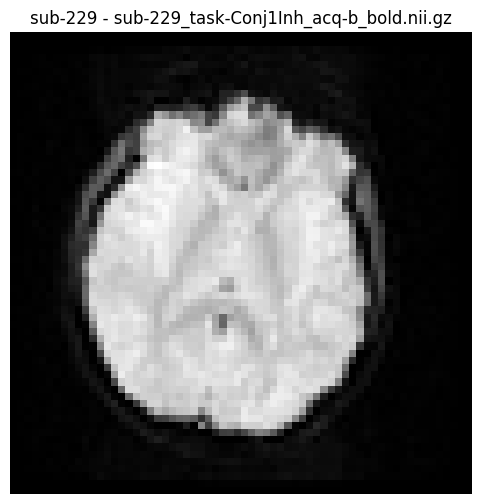

Visualizing functional image: sub-229_task-Conj9Inh_acq-b_bold.nii.gz


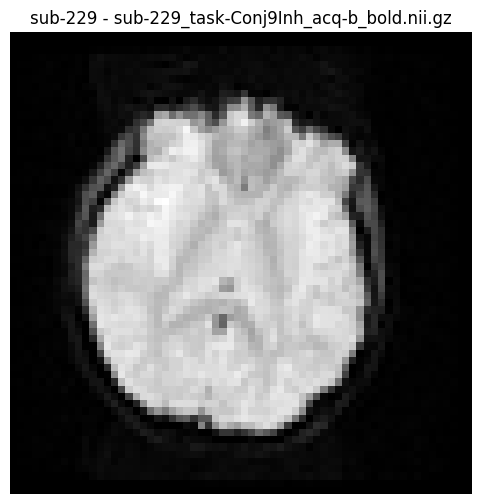

Visualizing functional image: sub-229_task-Conj19Sel_acq-b_bold.nii.gz


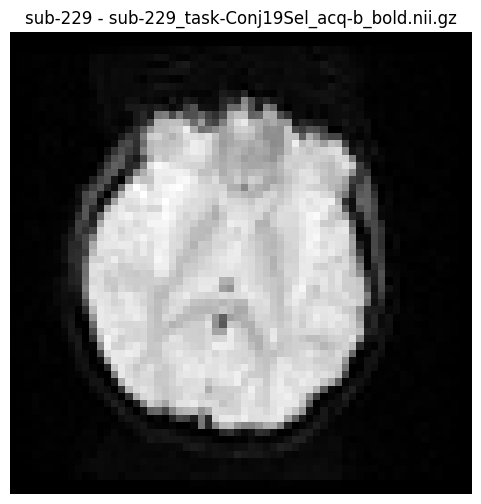

Processing subject: sub-213
Visualizing anatomical image: sub-213_acq-a_T1w.nii.gz


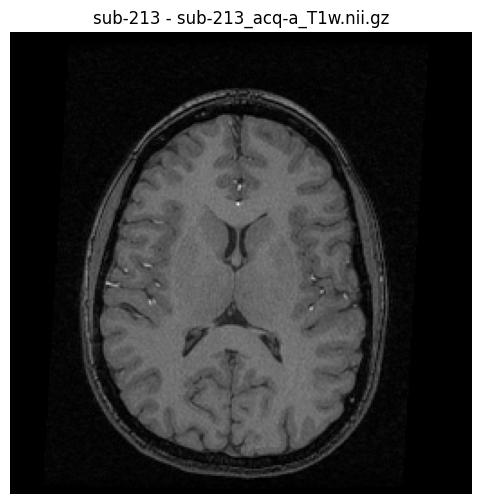

Visualizing anatomical image: sub-213_acq-b_T1w.nii.gz


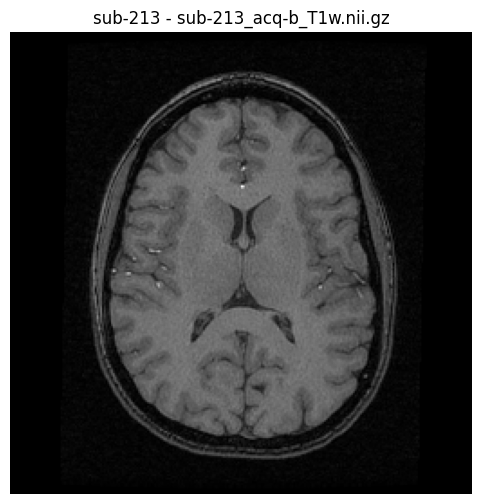

Visualizing functional image: sub-213_task-Feat1Inh_acq-b_bold.nii.gz


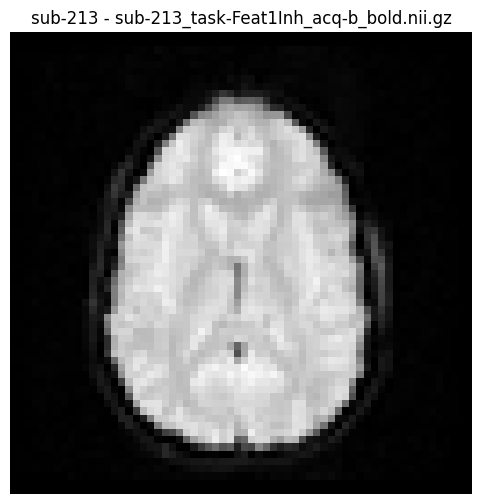

Visualizing functional image: sub-213_task-Feat19Sel_acq-b_bold.nii.gz


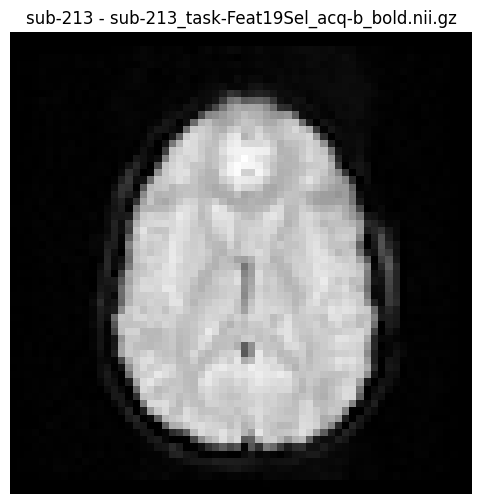

Visualizing functional image: sub-213_task-Conj9Inh_acq-a_bold.nii.gz


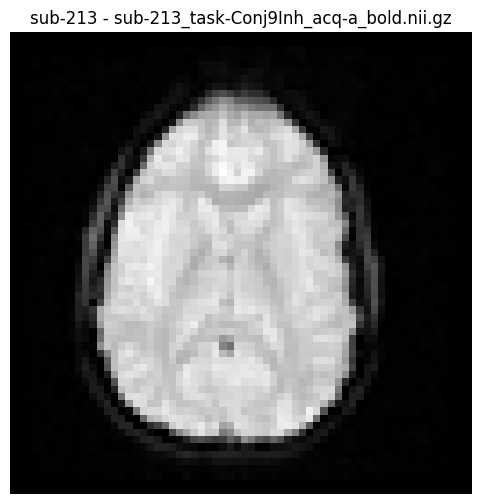

Visualizing functional image: sub-213_task-Feat9Inh_acq-b_bold.nii.gz


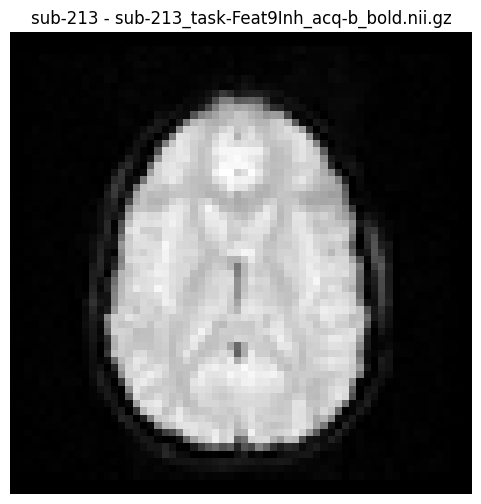

Visualizing functional image: sub-213_task-Conj1Inh_acq-a_bold.nii.gz


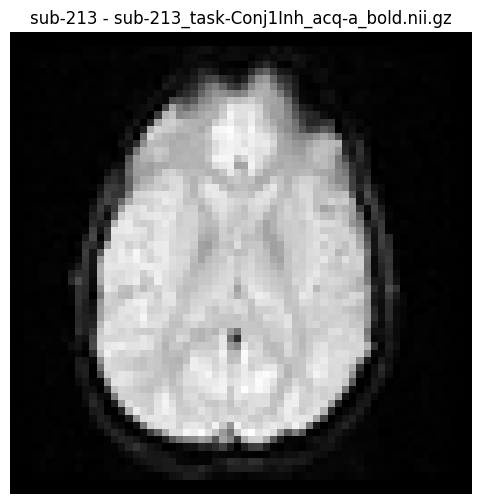

Visualizing functional image: sub-213_task-Conj19Sel_acq-a_bold.nii.gz


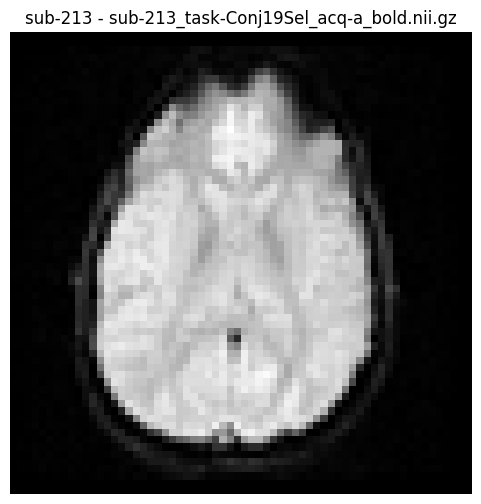

Processing subject: sub-219
Visualizing anatomical image: sub-219_acq-a_T1w.nii.gz


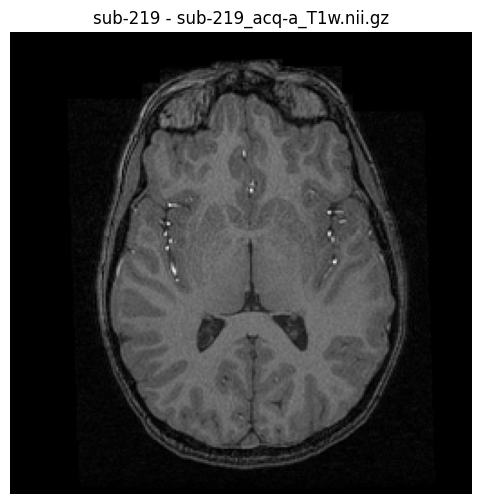

Visualizing anatomical image: sub-219_acq-b_T1w.nii.gz


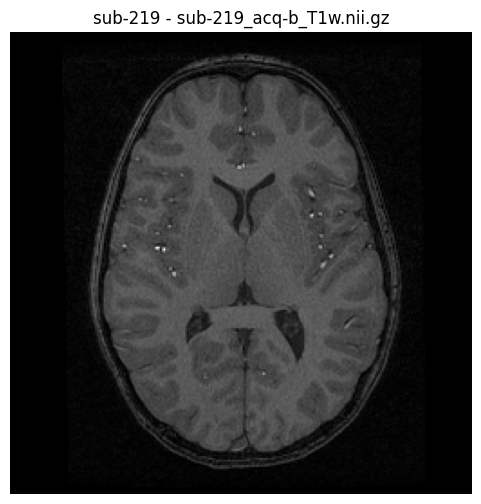

Visualizing functional image: sub-219_task-Feat19Sel_acq-a_bold.nii.gz


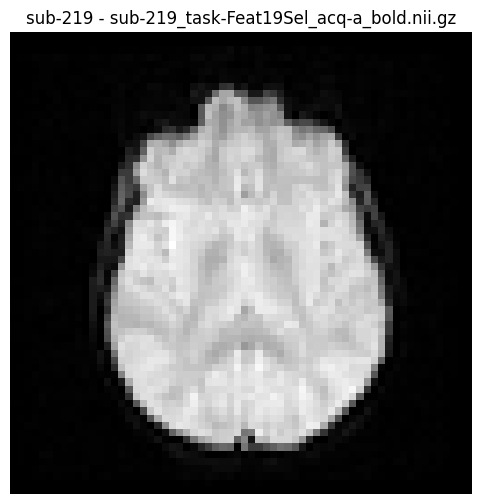

Visualizing functional image: sub-219_task-Conj1Inh_acq-b_bold.nii.gz


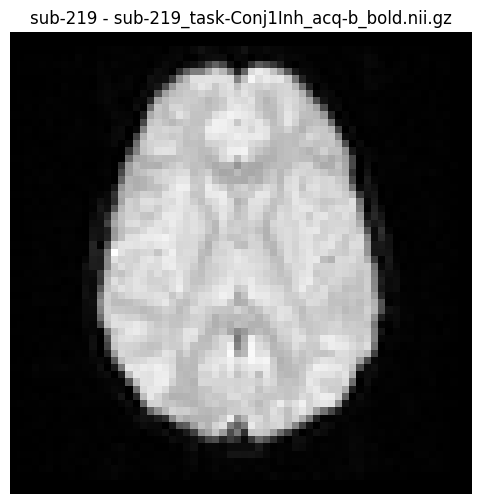

Visualizing functional image: sub-219_task-Conj9Inh_acq-b_bold.nii.gz


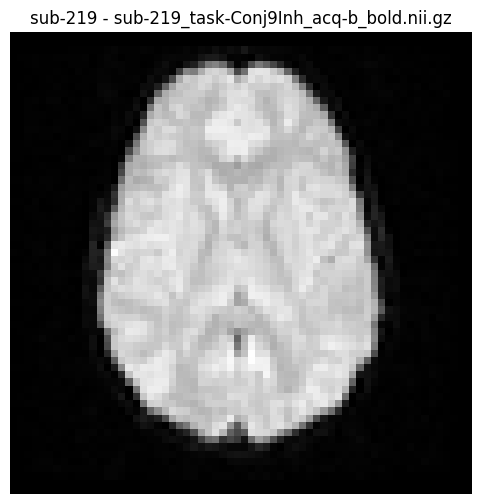

Visualizing functional image: sub-219_task-Feat1Inh_acq-a_bold.nii.gz


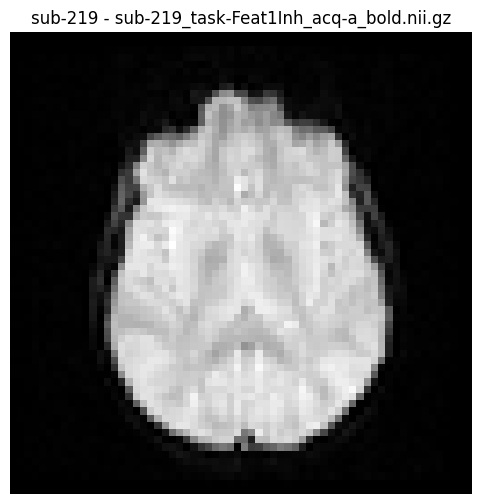

Visualizing functional image: sub-219_task-Feat9Inh_acq-a_bold.nii.gz


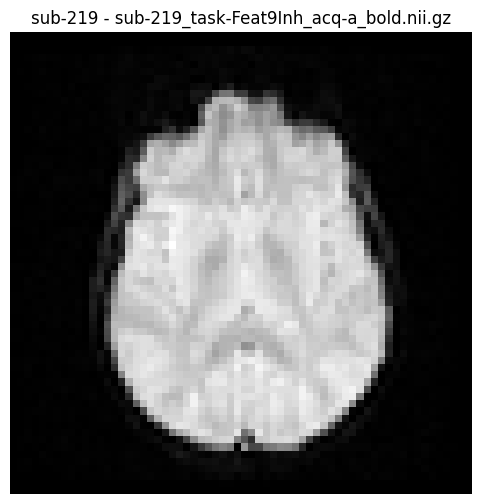

Visualizing functional image: sub-219_task-Conj19Sel_acq-b_bold.nii.gz


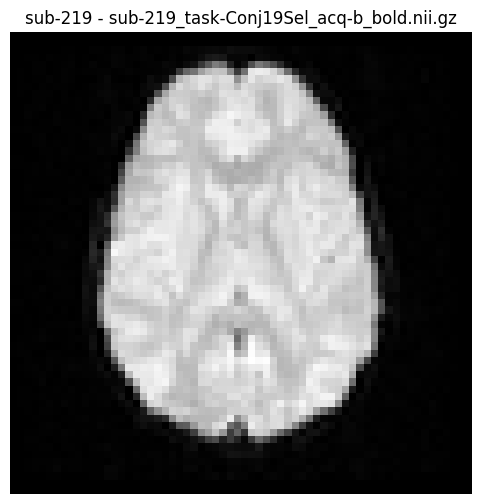

Processing subject: sub-233
Visualizing anatomical image: sub-233_acq-a_T1w.nii.gz


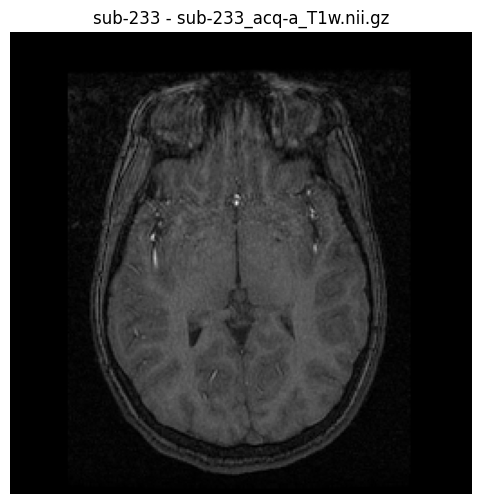

Visualizing anatomical image: sub-233_acq-b_T1w.nii.gz


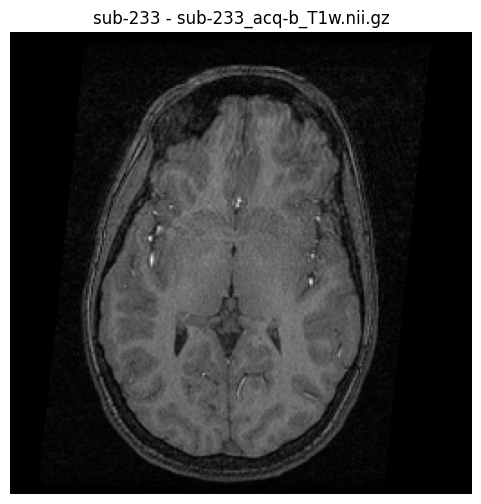

Visualizing functional image: sub-233_task-Conj1Inh_acq-b_bold.nii.gz
Skipping empty file: ./sub-233/func/sub-233_task-Conj1Inh_acq-b_bold.nii.gz
Visualizing functional image: sub-233_task-Conj19Sel_acq-b_bold.nii.gz


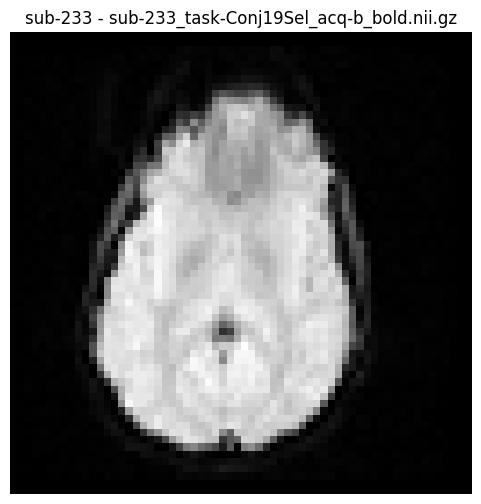

Processing subject: sub-218
Visualizing anatomical image: sub-218_acq-a_T1w.nii.gz


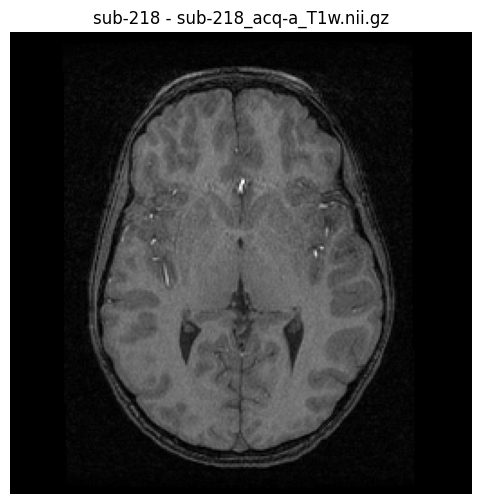

Visualizing anatomical image: sub-218_acq-b_T1w.nii.gz


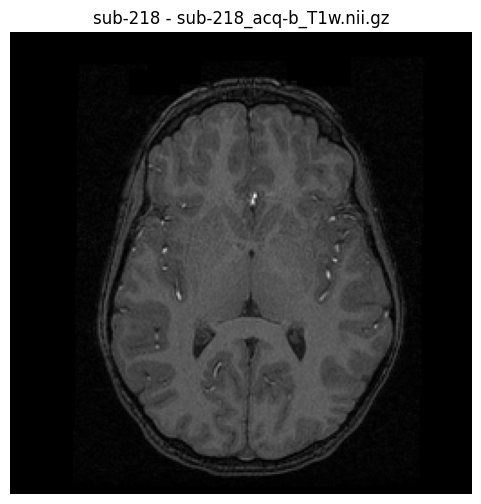

Visualizing functional image: sub-218_task-Feat19Sel_acq-a_bold.nii.gz


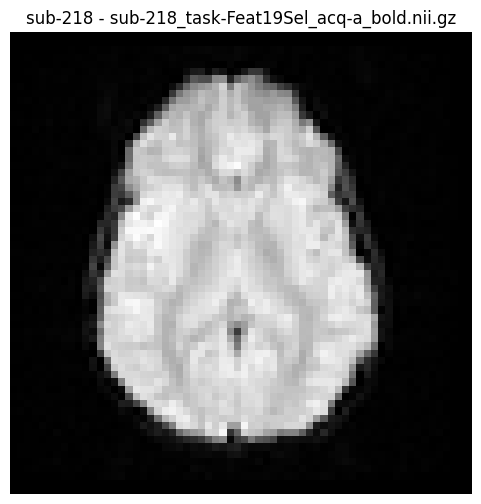

Visualizing functional image: sub-218_task-Conj1Inh_acq-b_bold.nii.gz


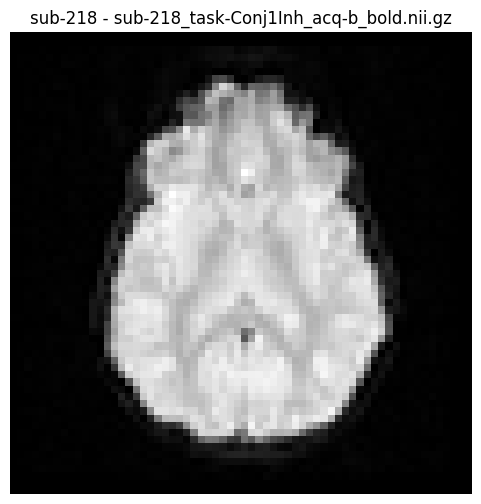

Visualizing functional image: sub-218_task-Feat1Inh_acq-a_bold.nii.gz


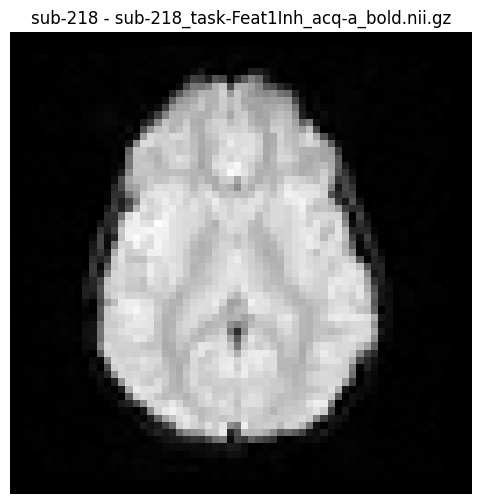

Visualizing functional image: sub-218_task-Conj9Inh_acq-b_bold.nii.gz


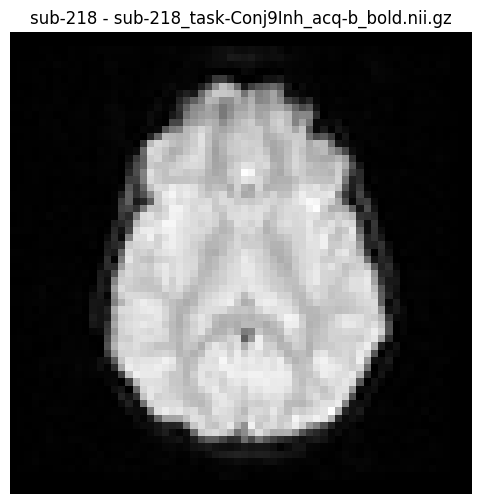

Visualizing functional image: sub-218_task-Conj19Sel_acq-b_bold.nii.gz


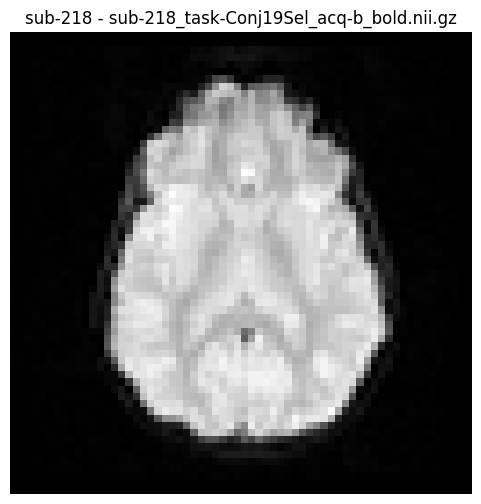

Visualizing functional image: sub-218_task-Feat9Inh_acq-a_bold.nii.gz


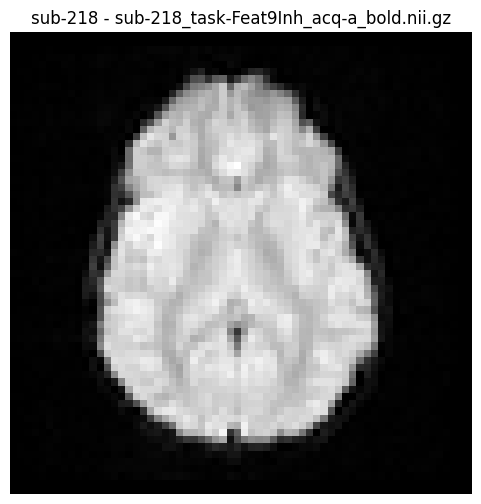

Processing subject: sub-214
Visualizing anatomical image: sub-214_acq-a_T1w.nii.gz


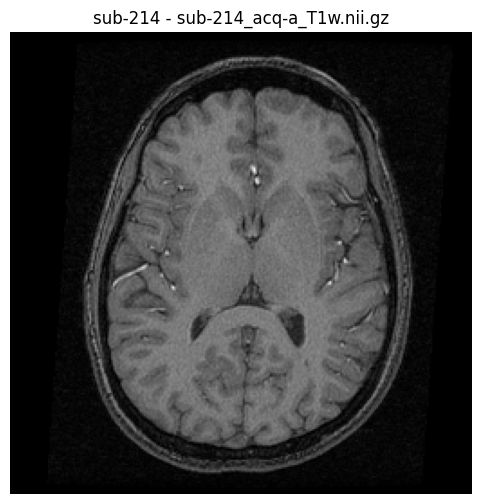

Visualizing functional image: sub-214_task-Feat9Inh_acq-a_bold.nii.gz


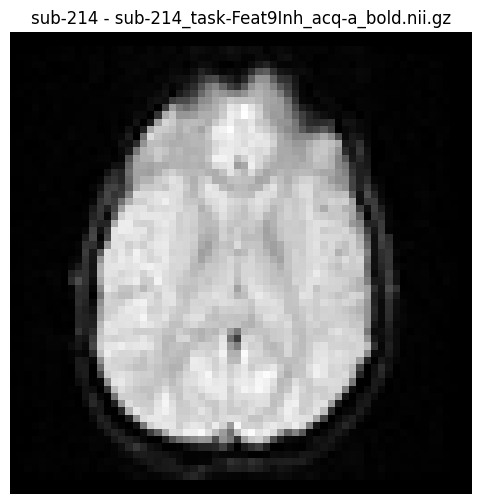

Visualizing functional image: sub-214_task-Conj1Inh_acq-a_bold.nii.gz


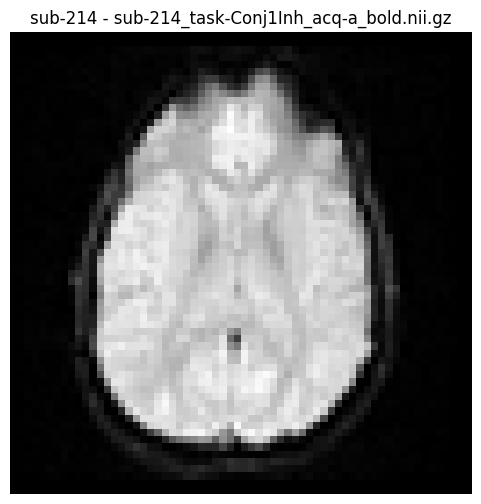

Visualizing functional image: sub-214_task-Conj9Inh_acq-a_bold.nii.gz


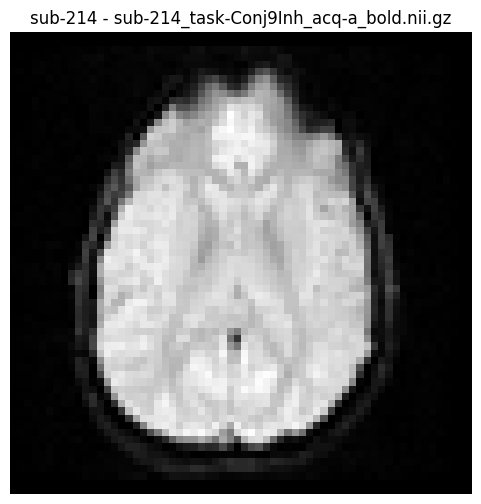

Visualizing functional image: sub-214_task-Conj19Sel_acq-a_bold.nii.gz


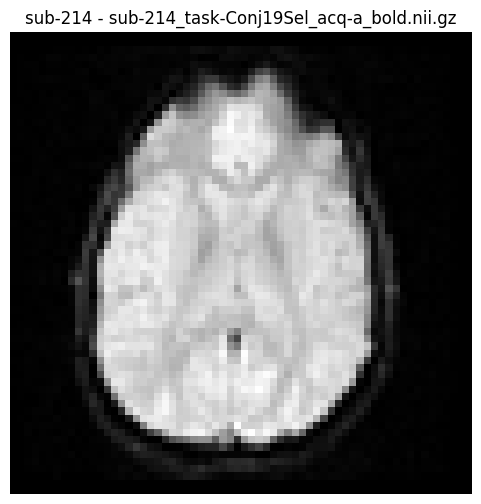

Processing subject: sub-220
Visualizing anatomical image: sub-220_acq-a_T1w.nii.gz


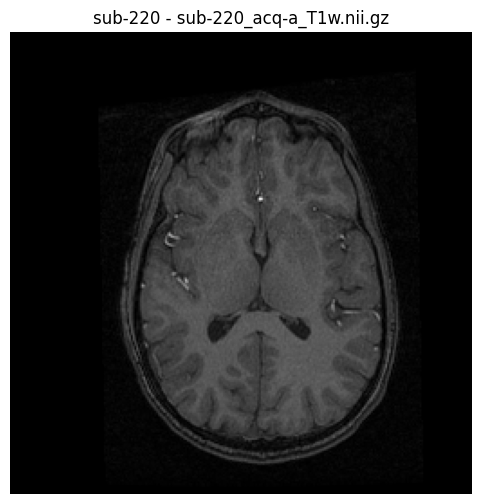

Visualizing anatomical image: sub-220_acq-b_T1w.nii.gz


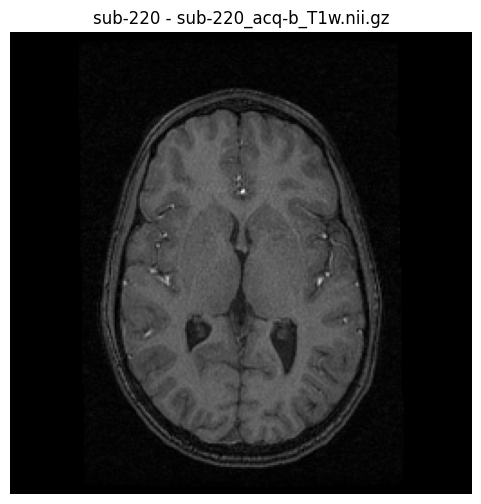

Visualizing functional image: sub-220_task-Feat9Inh_acq-b_bold.nii.gz


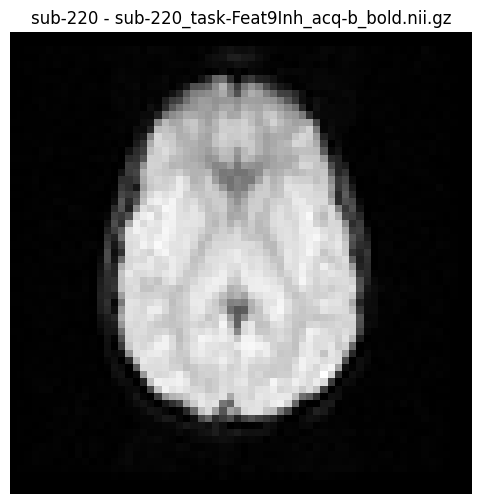

Visualizing functional image: sub-220_task-Conj1Inh_acq-a_bold.nii.gz


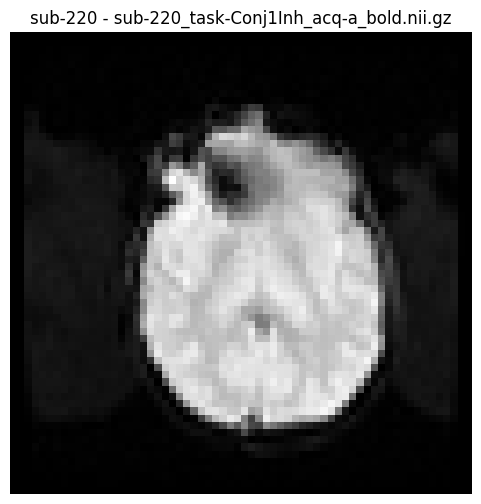

Visualizing functional image: sub-220_task-Conj19Sel_acq-a_bold.nii.gz


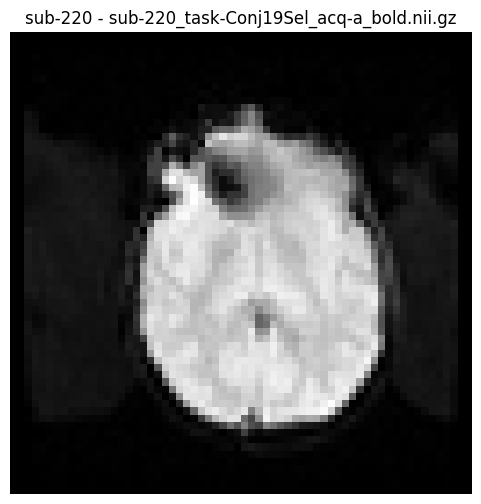

Visualizing functional image: sub-220_task-Feat19Sel_acq-b_bold.nii.gz


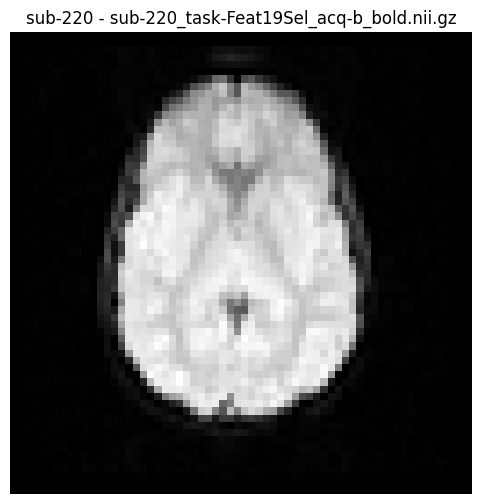

Visualizing functional image: sub-220_task-Feat1Inh_acq-b_bold.nii.gz


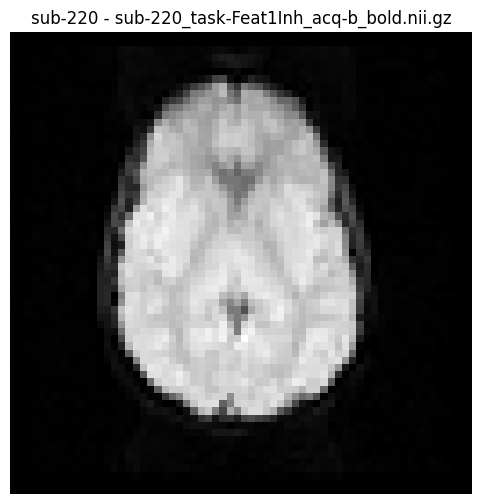

Visualizing functional image: sub-220_task-Conj9Inh_acq-a_bold.nii.gz


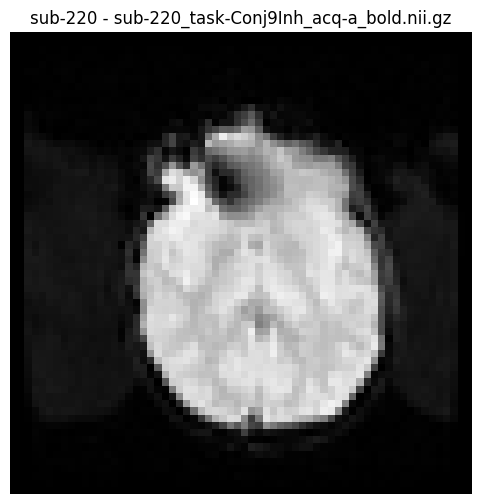

Processing subject: sub-222
Visualizing anatomical image: sub-222_acq-a_T1w.nii.gz


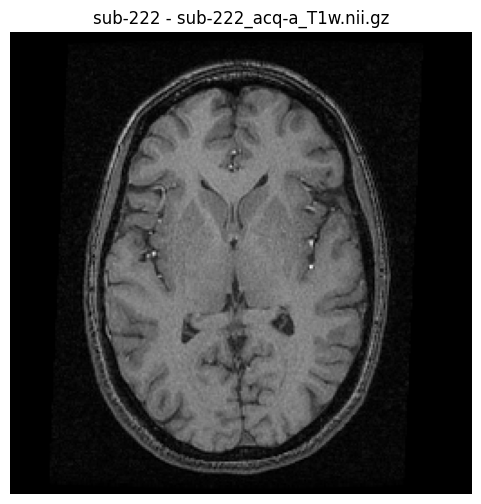

Visualizing functional image: sub-222_task-Conj9Inh_acq-a_bold.nii.gz


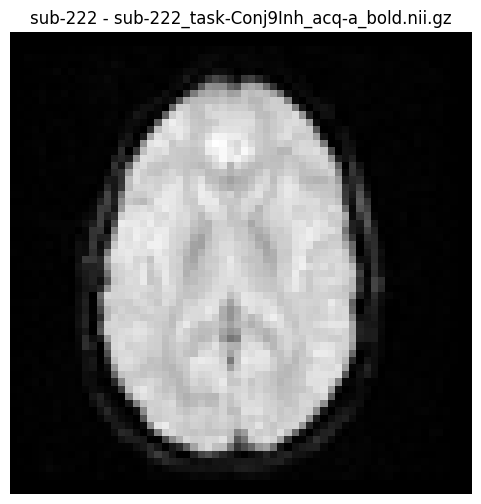

Visualizing functional image: sub-222_task-Feat1Inh_acq-a_bold.nii.gz


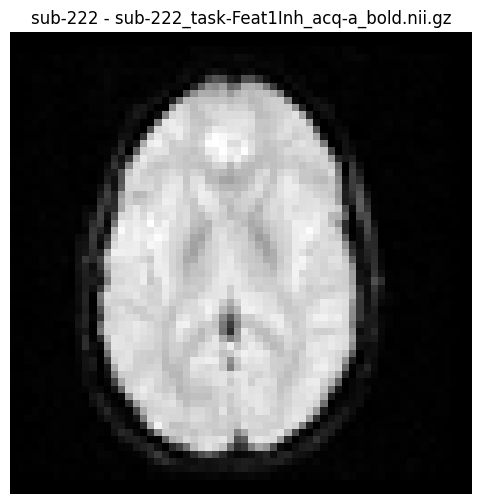

Visualizing functional image: sub-222_task-Conj1Inh_acq-a_bold.nii.gz


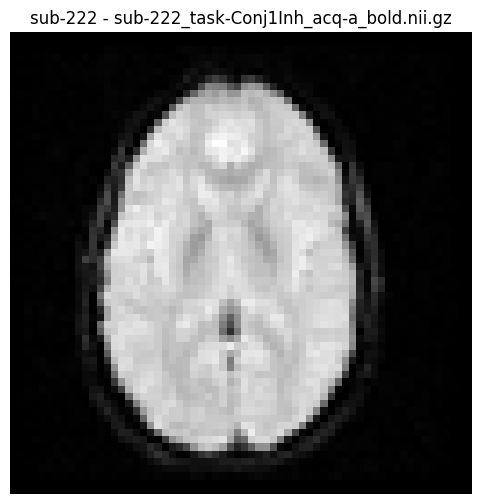

Visualizing functional image: sub-222_task-Feat9Inh_acq-a_bold.nii.gz


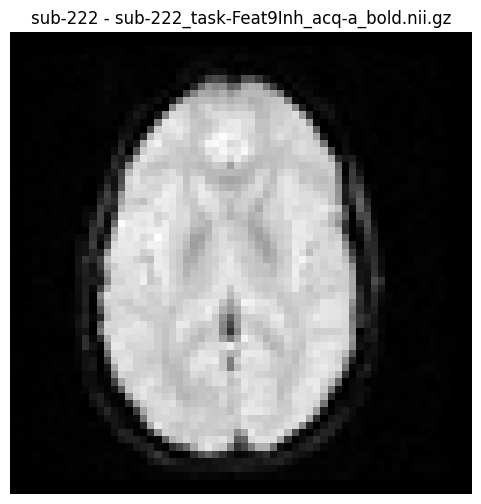

Visualizing functional image: sub-222_task-Feat19Sel_acq-a_bold.nii.gz


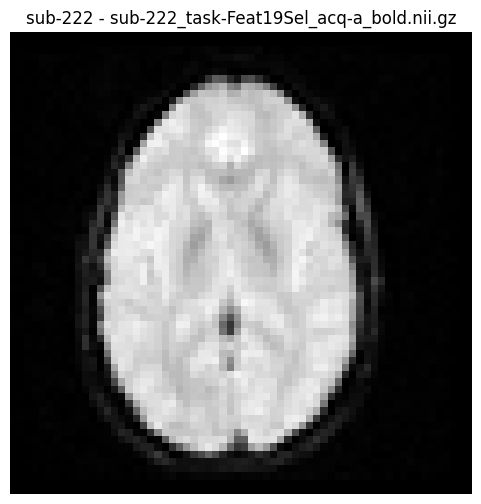

Visualizing functional image: sub-222_task-Conj19Sel_acq-a_bold.nii.gz


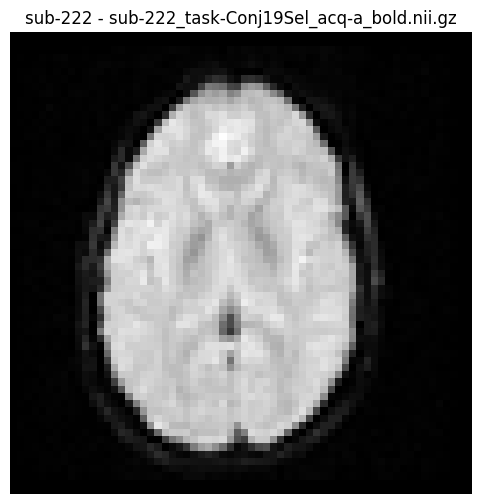

Processing subject: sub-232
Visualizing anatomical image: sub-232_acq-b_T1w.nii.gz


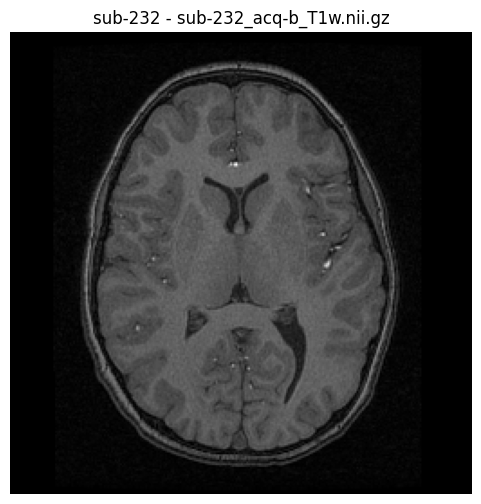

Visualizing anatomical image: sub-232_acq-a_T1w.nii.gz


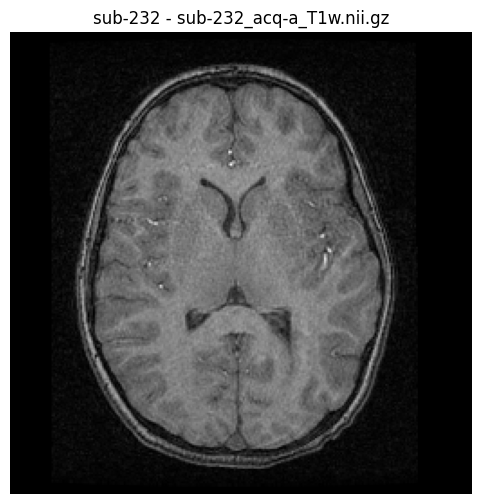

Visualizing functional image: sub-232_task-Conj19Sel_acq-b_bold.nii.gz


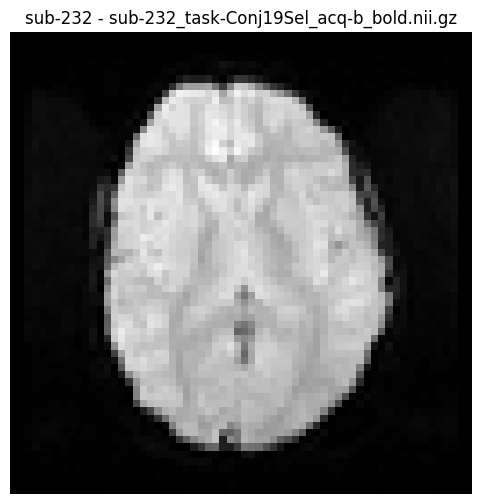

Visualizing functional image: sub-232_task-Feat9Inh_acq-a_bold.nii.gz


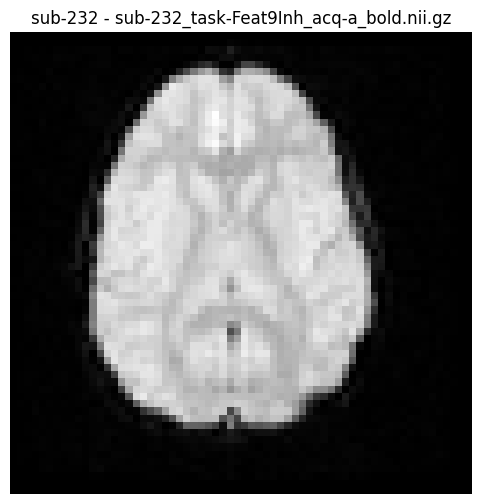

Visualizing functional image: sub-232_task-Conj1Inh_acq-b_bold.nii.gz


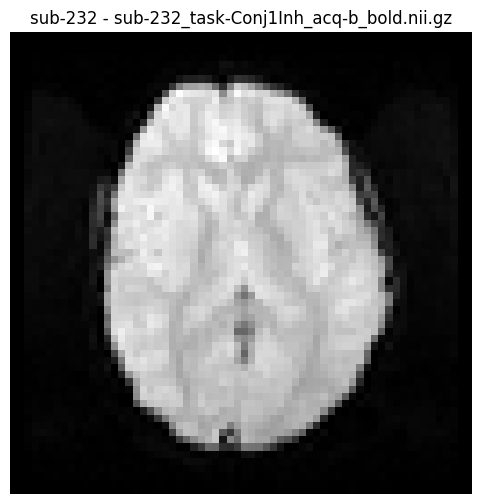

Visualizing functional image: sub-232_task-Conj9Inh_acq-b_bold.nii.gz


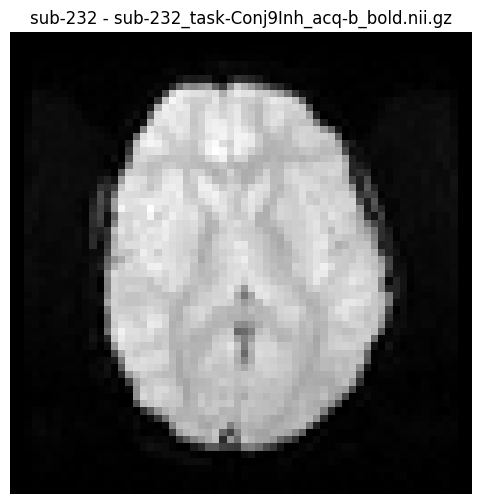

Visualizing functional image: sub-232_task-Feat19Sel_acq-a_bold.nii.gz


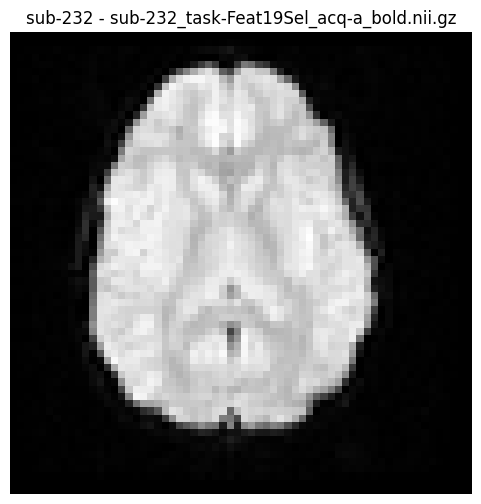

Visualizing functional image: sub-232_task-Feat1Inh_acq-a_bold.nii.gz


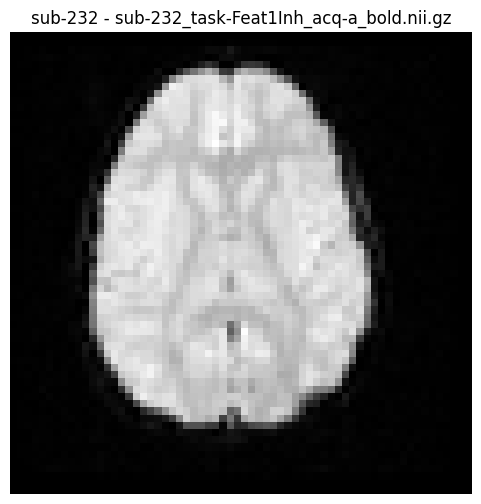

Processing subject: sub-228
Visualizing anatomical image: sub-228_acq-b_T1w.nii.gz


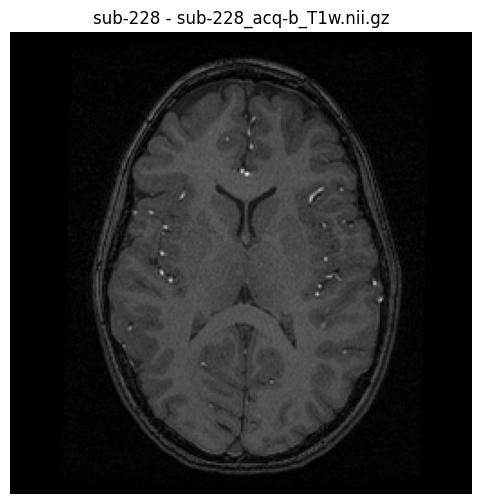

Visualizing anatomical image: sub-228_acq-a_T1w.nii.gz


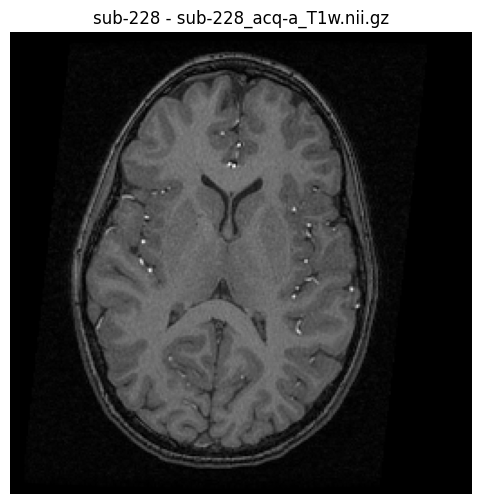

Visualizing functional image: sub-228_task-Conj1Inh_acq-b_bold.nii.gz


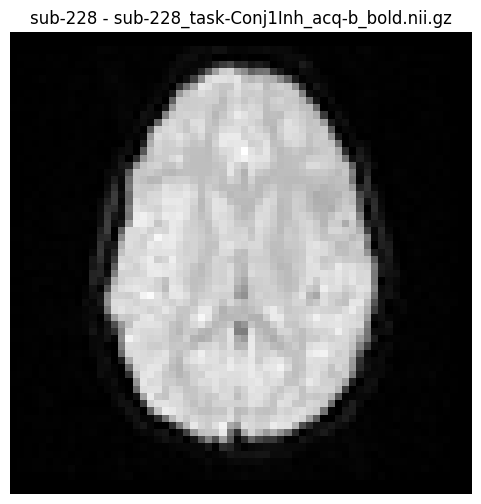

Visualizing functional image: sub-228_task-Feat1Inh_acq-a_bold.nii.gz


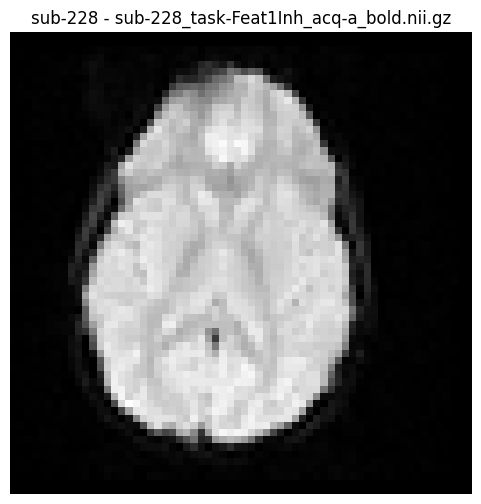

Visualizing functional image: sub-228_task-Feat9Inh_acq-a_bold.nii.gz


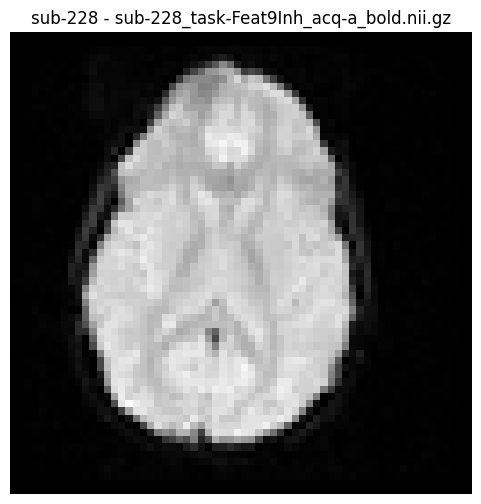

Visualizing functional image: sub-228_task-Conj19Sel_acq-b_bold.nii.gz


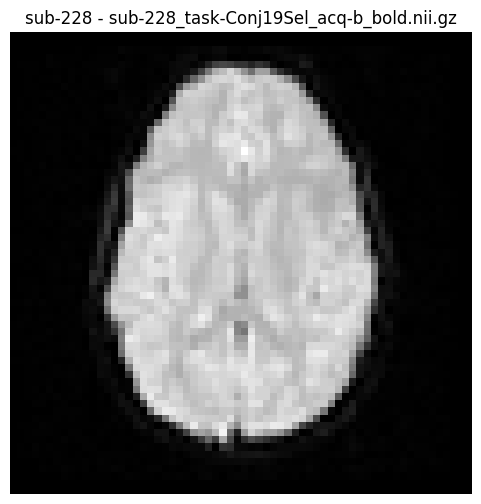

Visualizing functional image: sub-228_task-Conj9Inh_acq-b_bold.nii.gz


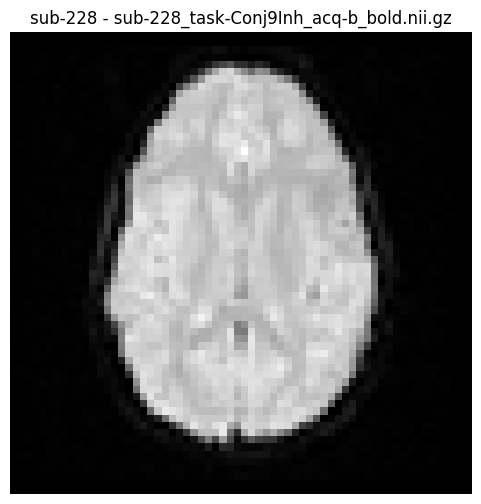

Visualizing functional image: sub-228_task-Feat19Sel_acq-a_bold.nii.gz


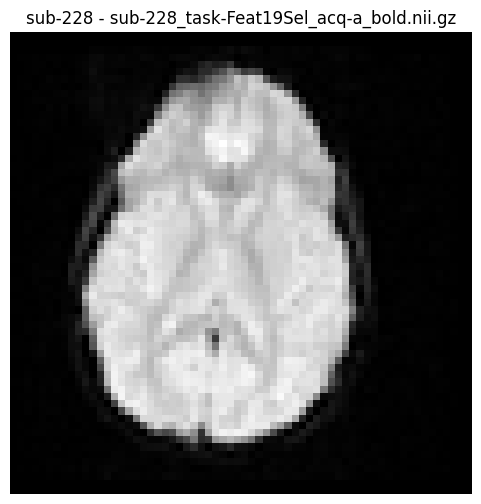

Processing subject: sub-231
Visualizing anatomical image: sub-231_acq-a_T1w.nii.gz


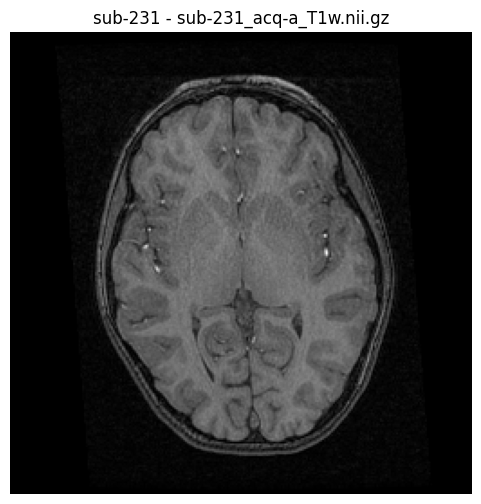

Visualizing functional image: sub-231_task-Feat9Inh_acq-a_bold.nii.gz


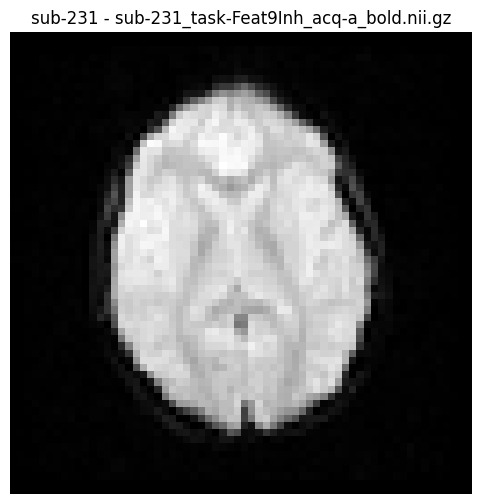

Visualizing functional image: sub-231_task-Feat19Sel_acq-a_bold.nii.gz


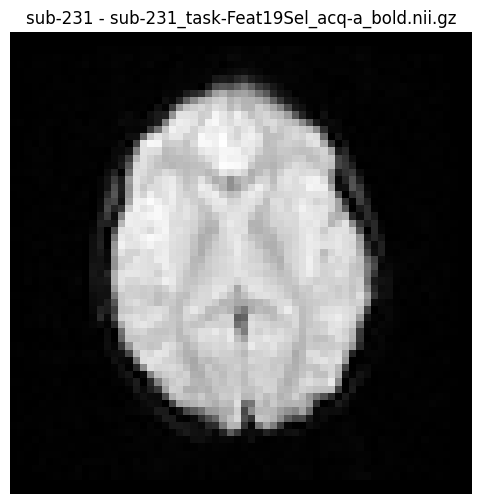

Visualizing functional image: sub-231_task-Feat1Inh_acq-a_bold.nii.gz


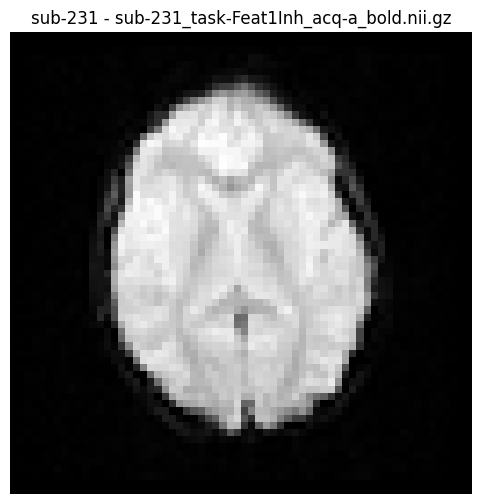

Processing subject: sub-230
Visualizing anatomical image: sub-230_acq-b_T1w.nii.gz


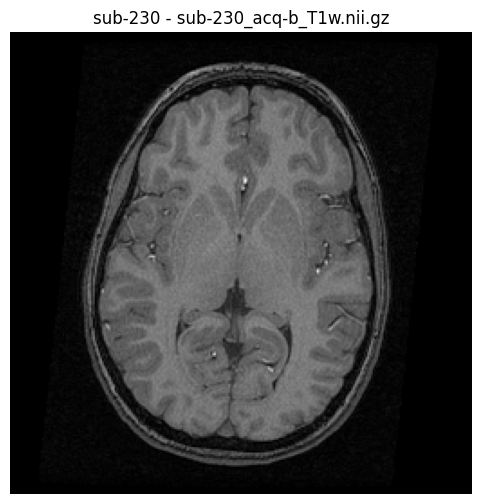

Visualizing anatomical image: sub-230_acq-a_T1w.nii.gz


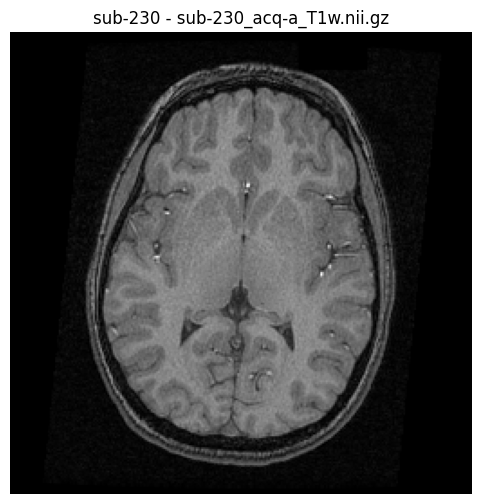

Visualizing functional image: sub-230_task-Conj9Inh_acq-b_bold.nii.gz


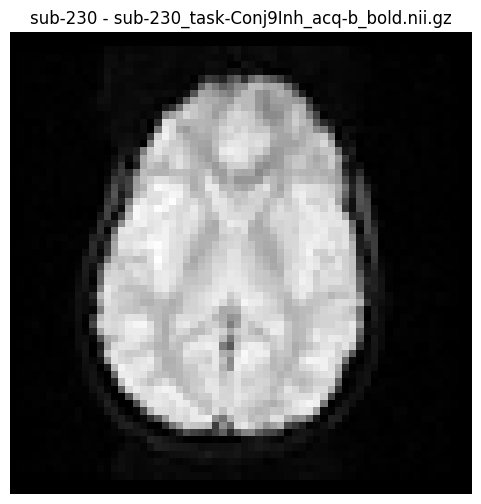

Visualizing functional image: sub-230_task-Feat1Inh_acq-a_bold.nii.gz


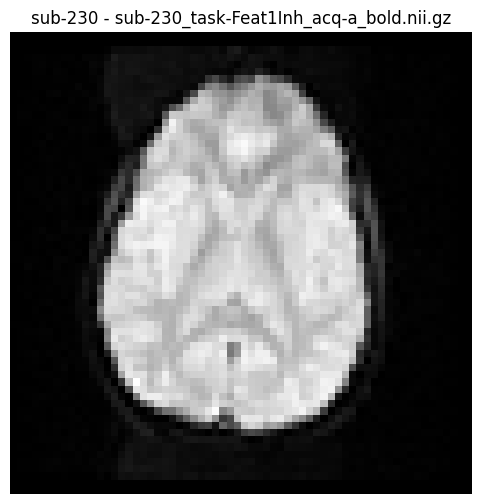

Visualizing functional image: sub-230_task-Feat9Inh_acq-a_bold.nii.gz


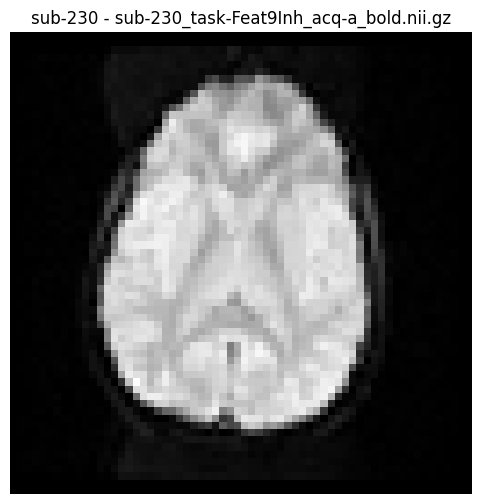

Visualizing functional image: sub-230_task-Conj19Sel_acq-b_bold.nii.gz


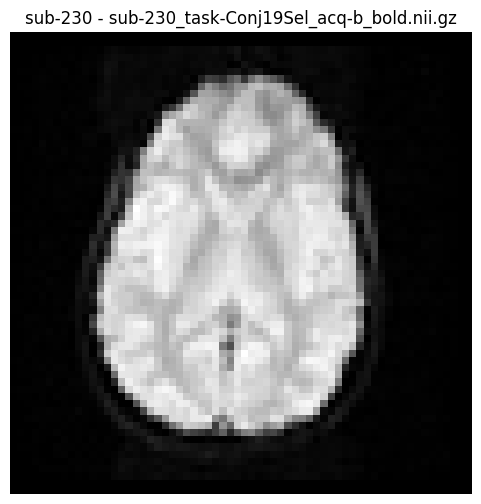

Visualizing functional image: sub-230_task-Conj1Inh_acq-b_bold.nii.gz


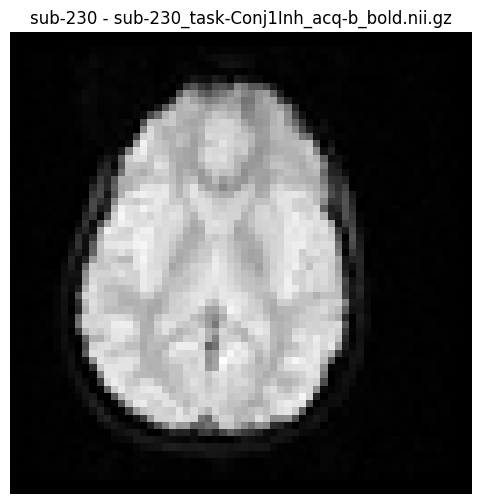

Visualizing functional image: sub-230_task-Feat19Sel_acq-a_bold.nii.gz


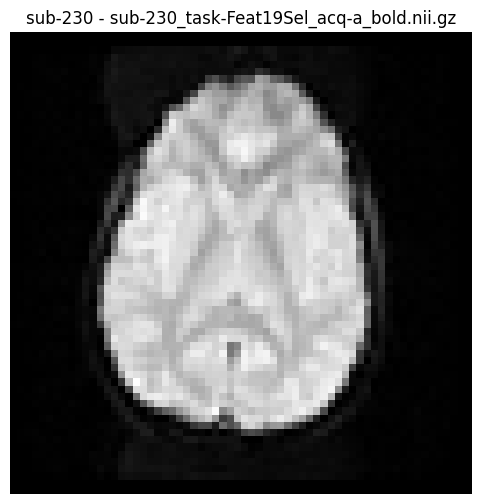

Processing subject: sub-224
Visualizing anatomical image: sub-224_acq-a_T1w.nii.gz


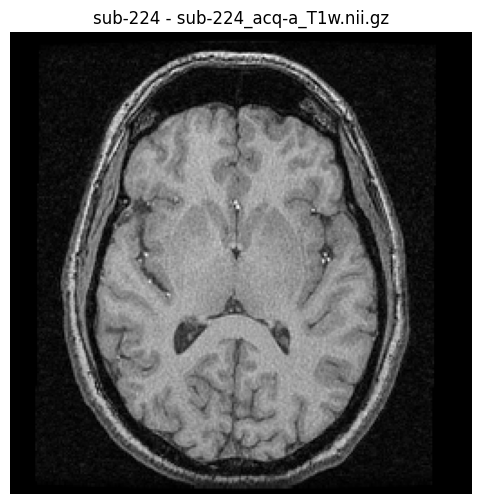

Visualizing functional image: sub-224_task-Conj9Inh_acq-a_bold.nii.gz


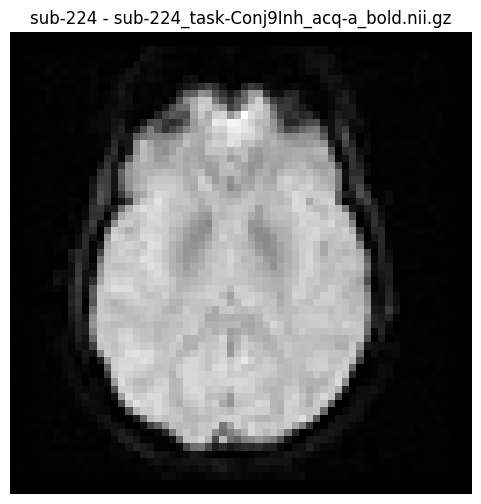

Visualizing functional image: sub-224_task-Feat9Inh_acq-a_bold.nii.gz


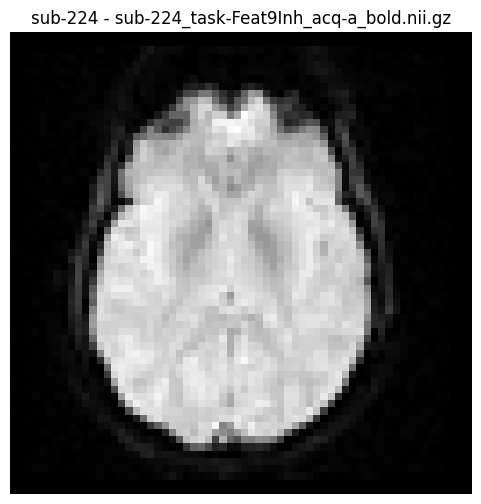

Visualizing functional image: sub-224_task-Feat1Inh_acq-a_bold.nii.gz


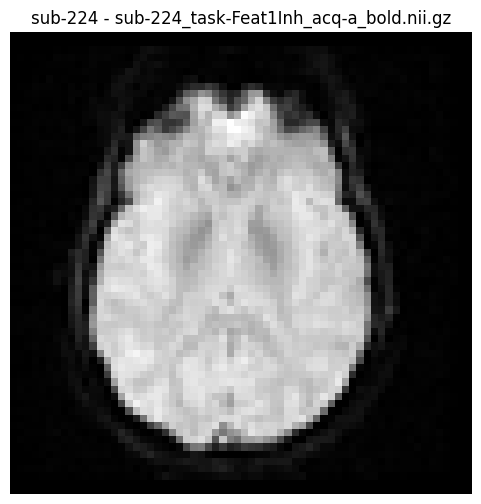

Visualizing functional image: sub-224_task-Conj19Sel_acq-a_bold.nii.gz


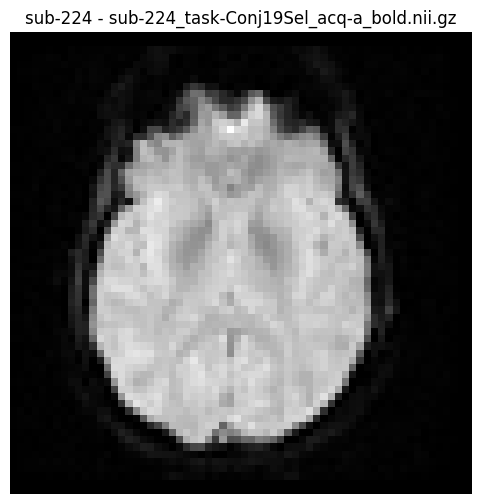

Visualizing functional image: sub-224_task-Feat19Sel_acq-a_bold.nii.gz


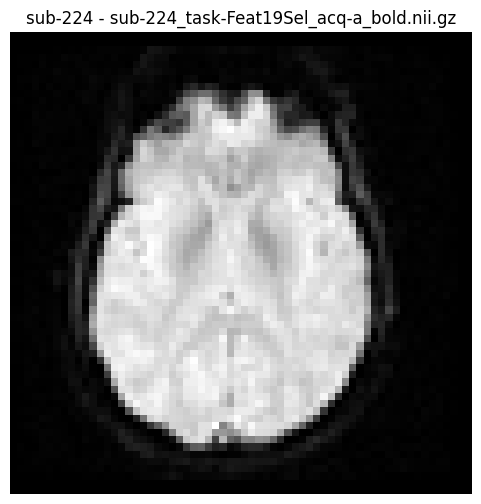

Visualizing functional image: sub-224_task-Conj1Inh_acq-a_bold.nii.gz


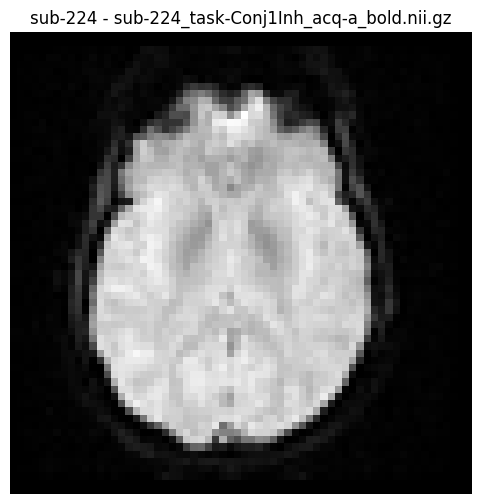

Processing subject: sub-226
Visualizing anatomical image: sub-226_acq-a_T1w.nii.gz


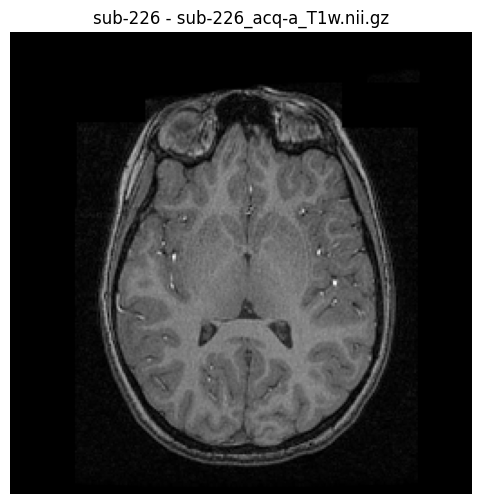

Visualizing anatomical image: sub-226_acq-b_T1w.nii.gz


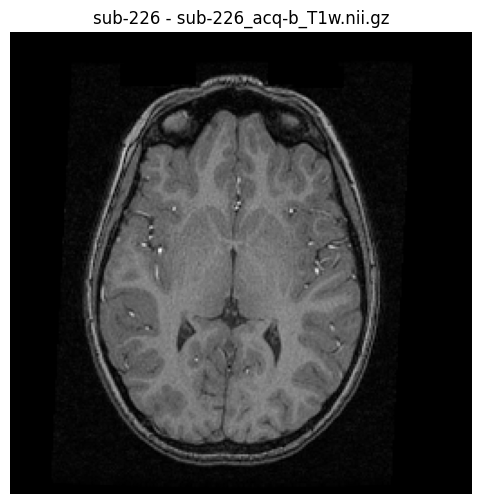

Visualizing functional image: sub-226_task-Conj19Sel_acq-b_bold.nii.gz


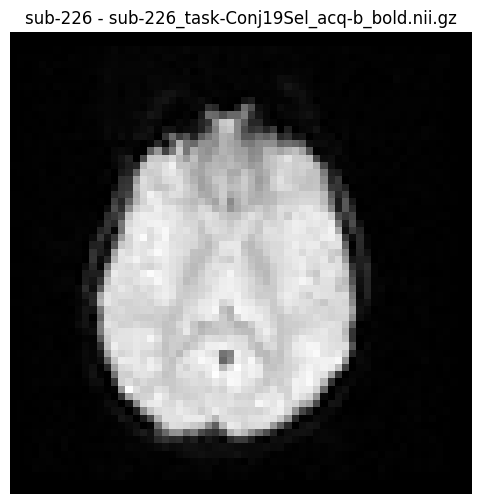

Visualizing functional image: sub-226_task-Feat1Inh_acq-a_bold.nii.gz


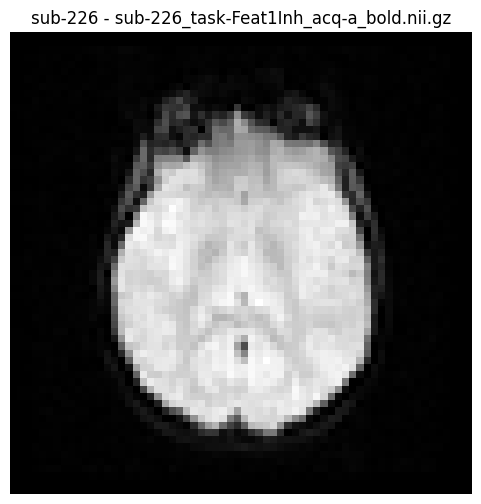

Visualizing functional image: sub-226_task-Conj1Inh_acq-b_bold.nii.gz


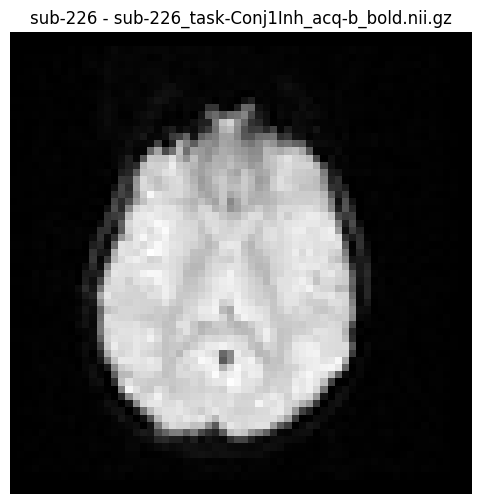

Visualizing functional image: sub-226_task-Feat19Sel_acq-a_bold.nii.gz


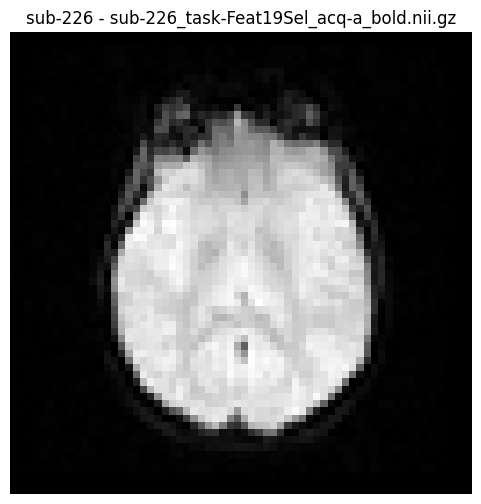

Visualizing functional image: sub-226_task-Feat9Inh_acq-a_bold.nii.gz


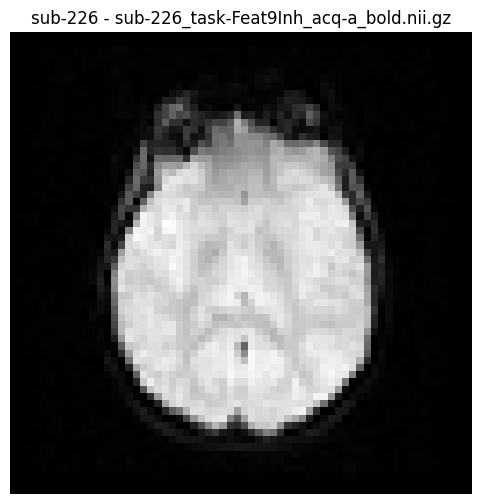

Visualizing functional image: sub-226_task-Conj9Inh_acq-b_bold.nii.gz


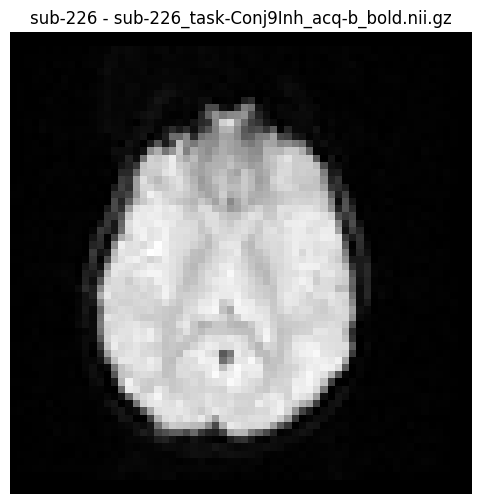

Processing subject: sub-225
Visualizing anatomical image: sub-225_acq-a_T1w.nii.gz


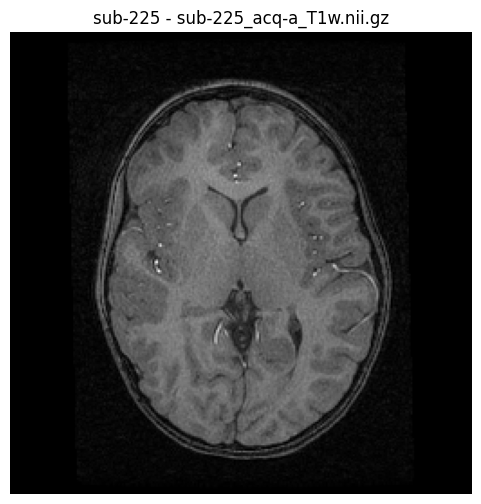

Visualizing anatomical image: sub-225_acq-b_T1w.nii.gz


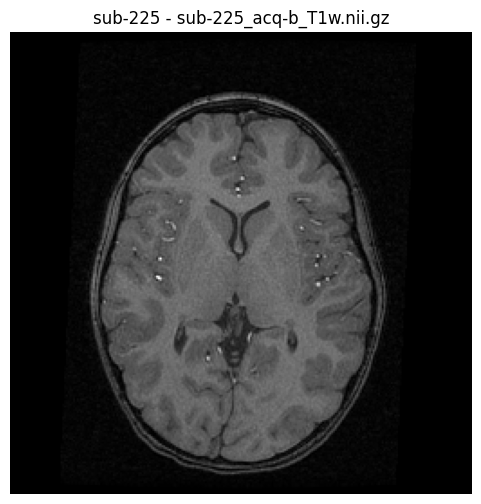

Visualizing functional image: sub-225_task-Conj9Inh_acq-b_bold.nii.gz


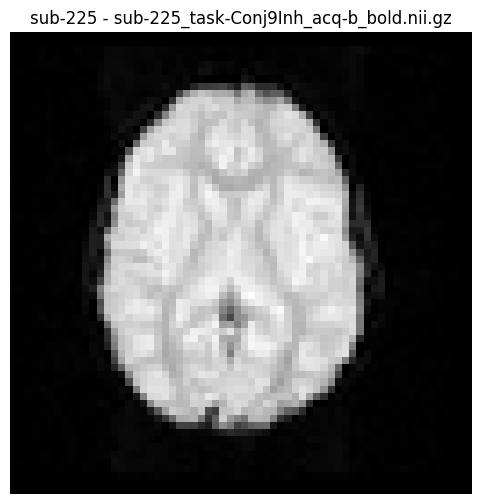

Visualizing functional image: sub-225_task-Feat19Sel_acq-a_bold.nii.gz


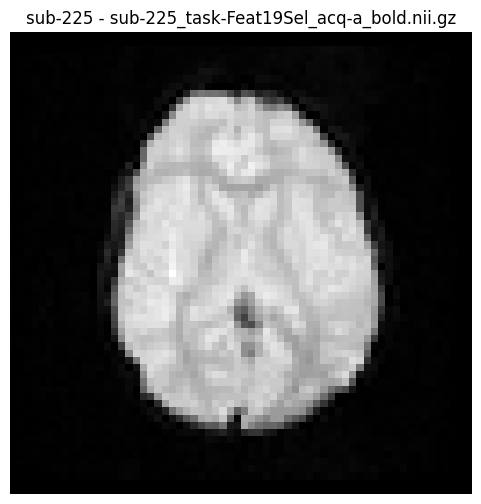

Visualizing functional image: sub-225_task-Conj19Sel_acq-b_bold.nii.gz


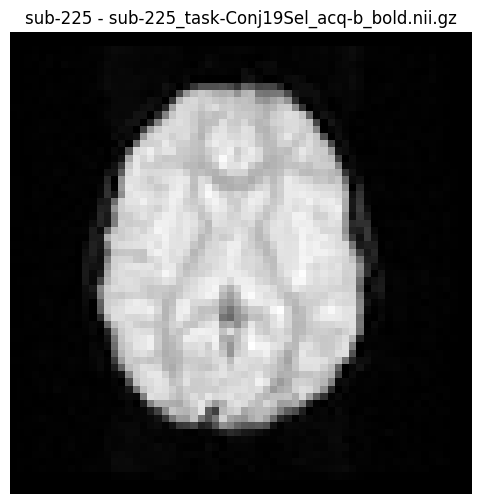

Visualizing functional image: sub-225_task-Feat1Inh_acq-a_bold.nii.gz


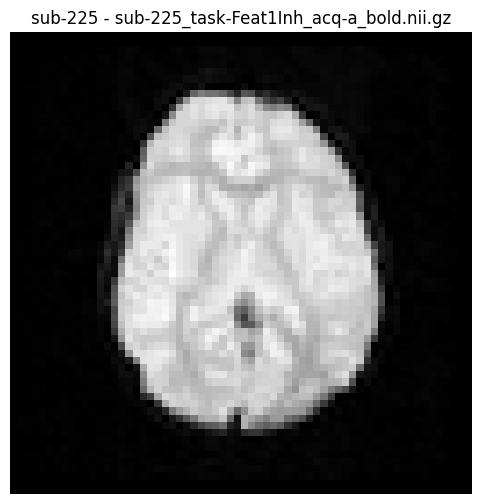

Visualizing functional image: sub-225_task-Conj1Inh_acq-b_bold.nii.gz


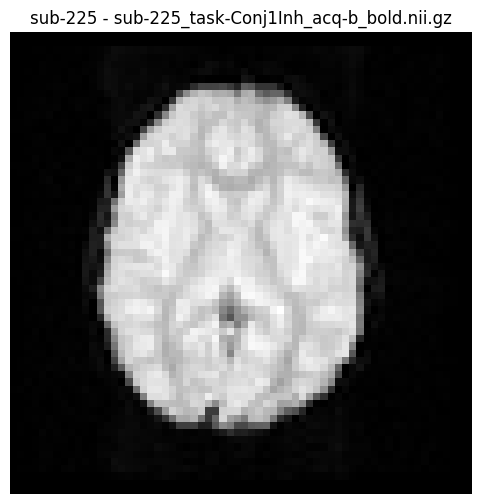

Visualizing functional image: sub-225_task-Feat9Inh_acq-a_bold.nii.gz


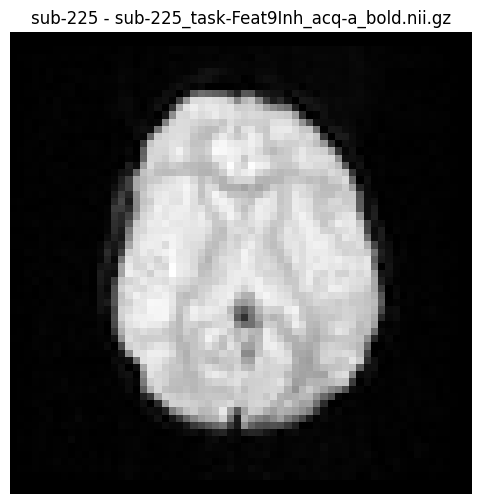

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

# Parent directory containing all subject folders
parent_dir = "./"

# Function to display a slice from a NIfTI image
def display_image(img_path, title, slice_axis=2, slice_idx=None, timepoint=None):
    # Check if the file is empty
    if os.path.getsize(img_path) == 0:
        print(f"Skipping empty file: {img_path}")
        return

    # Attempt to load the image
    try:
        img = nib.load(img_path)
    except nib.filebasedimages.ImageFileError as e:
        print(f"Error loading file: {img_path}\n{e}")
        return

    data = img.get_fdata()
    
    # Check if the image is 4D (functional)
    if data.ndim == 4:
        if timepoint is None:
            timepoint = data.shape[3] // 2  # Default to middle timepoint
        data = data[:, :, :, timepoint]  # Extract the slice from the selected timepoint

    # Determine slice index (default: middle slice along the specified axis)
    if slice_idx is None:
        slice_idx = data.shape[slice_axis] // 2

    # Extract the slice
    if slice_axis == 0:
        slice_data = data[slice_idx, :, :]
    elif slice_axis == 1:
        slice_data = data[:, slice_idx, :]
    else:  # Default to axis 2 (axial view)
        slice_data = data[:, :, slice_idx]
    
    # Display the image slice
    plt.figure(figsize=(6, 6))
    plt.imshow(np.rot90(slice_data), cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Loop through all subject directories
for subject in os.listdir(parent_dir):
    subject_path = os.path.join(parent_dir, subject)
    if os.path.isdir(subject_path) and subject.startswith("sub-"):
        print(f"Processing subject: {subject}")
        
        # Anatomical directory
        anat_dir = os.path.join(subject_path, "anat")
        if os.path.exists(anat_dir):
            for anat_file in os.listdir(anat_dir):
                if anat_file.endswith(".nii.gz"):
                    anat_path = os.path.join(anat_dir, anat_file)
                    print(f"Visualizing anatomical image: {anat_file}")
                    display_image(anat_path, title=f"{subject} - {anat_file}")

        # Functional directory
        func_dir = os.path.join(subject_path, "func")
        if os.path.exists(func_dir):
            for func_file in os.listdir(func_dir):
                if func_file.endswith("_bold.nii.gz"):
                    func_path = os.path.join(func_dir, func_file)
                    print(f"Visualizing functional image: {func_file}")
                    display_image(func_path, title=f"{subject} - {func_file}", slice_axis=2, timepoint=0)  # Choose the first timepoint as an example


In [5]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from sklearn.cluster import KMeans
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Parent directory containing all subject folders
parent_dir = "./"

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model that outputs the features from the last convolutional layer
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract features from an image using the CNN
def extract_features(img_path):
    # Load the image
    img = nib.load(img_path)
    data = img.get_fdata()

    # For simplicity, we'll use the middle slice for both anatomical and functional images
    slice_idx = data.shape[2] // 2  # Middle slice along axis 2 (axial view)
    slice_data = data[:, :, slice_idx]

    # Normalize the data to fit the input range of the model (224x224x3)
    slice_data_resized = np.array(slice_data, dtype=np.float32)
    slice_data_resized = np.expand_dims(slice_data_resized, axis=-1)  # Add channel dimension
    slice_data_resized = np.repeat(slice_data_resized, 3, axis=-1)  # Replicate to 3 channels
    slice_data_resized = np.resize(slice_data_resized, (224, 224, 3))

    # Preprocess the image for the VGG16 model
    img_array = np.expand_dims(slice_data_resized, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features using the CNN model
    features = model.predict(img_array)
    features = features.flatten()  # Flatten the feature map to a 1D array
    return features

# Store the features and paths of anatomical and functional images
features = []
paths = []

# Loop through all subject directories
for subject in os.listdir(parent_dir):
    subject_path = os.path.join(parent_dir, subject)
    if os.path.isdir(subject_path) and subject.startswith("sub-"):
        print(f"Processing subject: {subject}")
        
        # Anatomical directory
        anat_dir = os.path.join(subject_path, "anat")
        if os.path.exists(anat_dir):
            for anat_file in os.listdir(anat_dir):
                if anat_file.endswith(".nii.gz"):
                    anat_path = os.path.join(anat_dir, anat_file)
                    print(f"Extracting features from anatomical image: {anat_file}")
                    features.append(extract_features(anat_path))
                    paths.append(anat_path)

        # Functional directory
        func_dir = os.path.join(subject_path, "func")
        if os.path.exists(func_dir):
            for func_file in os.listdir(func_dir):
                if func_file.endswith("_bold.nii.gz"):
                    func_path = os.path.join(func_dir, func_file)
                    print(f"Extracting features from functional image: {func_file}")
                    features.append(extract_features(func_path))
                    paths.append(func_path)

# Convert features to a NumPy array
features = np.array(features)

# Apply k-means clustering to the extracted features
n_clusters = 2  # Number of clusters (anatomical vs functional)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features)

# Display the results of the clustering
for i, label in enumerate(kmeans.labels_):
    print(f"Image: {paths[i]} | Cluster: {label}")


Processing subject: sub-221
Extracting features from anatomical image: sub-221_acq-b_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
Extracting features from anatomical image: sub-221_acq-a_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Extracting features from functional image: sub-221_task-Feat1Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Extracting features from functional image: sub-221_task-Conj19Sel_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Extracting features from functional image: sub-221_task-Conj9Inh_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Extracting features from functional image: sub-221_task-Feat19Sel_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Extracting features from functional image: sub-221_task-Feat9Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Extracting features from functional image: sub-221_task-Conj1Inh_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Processing subject: sub-

ImageFileError: Empty file: 'sub-233/func/sub-233_task-Conj1Inh_acq-b_bold.nii.gz'

In [6]:
import nibabel as nib
import numpy as np
import os
import tensorflow as tf
from sklearn.cluster import KMeans
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Parent directory containing all subject folders
parent_dir = "./"

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model that outputs the features from the last convolutional layer
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract features from an image using the CNN
def extract_features(img_path):
    try:
        # Load the image
        img = nib.load(img_path)
        data = img.get_fdata()

        if data.size == 0:
            print(f"Warning: The file {img_path} is empty. Skipping.")
            return None

        # For simplicity, we'll use the middle slice for both anatomical and functional images
        slice_idx = data.shape[2] // 2  # Middle slice along axis 2 (axial view)
        slice_data = data[:, :, slice_idx]

        # Normalize the data to fit the input range of the model (224x224x3)
        slice_data_resized = np.array(slice_data, dtype=np.float32)
        slice_data_resized = np.expand_dims(slice_data_resized, axis=-1)  # Add channel dimension
        slice_data_resized = np.repeat(slice_data_resized, 3, axis=-1)  # Replicate to 3 channels
        slice_data_resized = np.resize(slice_data_resized, (224, 224, 3))

        # Preprocess the image for the VGG16 model
        img_array = np.expand_dims(slice_data_resized, axis=0)
        img_array = preprocess_input(img_array)

        # Extract features using the CNN model
        features = model.predict(img_array)
        features = features.flatten()  # Flatten the feature map to a 1D array
        return features
    except Exception as e:
        print(f"Error processing file {img_path}: {e}")
        return None

# Store the features and paths of anatomical and functional images
features = []
paths = []

# Loop through all subject directories
for subject in os.listdir(parent_dir):
    subject_path = os.path.join(parent_dir, subject)
    if os.path.isdir(subject_path) and subject.startswith("sub-"):
        print(f"Processing subject: {subject}")
        
        # Anatomical directory
        anat_dir = os.path.join(subject_path, "anat")
        if os.path.exists(anat_dir):
            for anat_file in os.listdir(anat_dir):
                if anat_file.endswith(".nii.gz"):
                    anat_path = os.path.join(anat_dir, anat_file)
                    print(f"Extracting features from anatomical image: {anat_file}")
                    features_data = extract_features(anat_path)
                    if features_data is not None:
                        features.append(features_data)
                        paths.append(anat_path)

        # Functional directory
        func_dir = os.path.join(subject_path, "func")
        if os.path.exists(func_dir):
            for func_file in os.listdir(func_dir):
                if func_file.endswith("_bold.nii.gz"):
                    func_path = os.path.join(func_dir, func_file)
                    print(f"Extracting features from functional image: {func_file}")
                    features_data = extract_features(func_path)
                    if features_data is not None:
                        features.append(features_data)
                        paths.append(func_path)

# Convert features to a NumPy array
features = np.array(features)

# Apply k-means clustering to the extracted features
n_clusters = 2  # Number of clusters (anatomical vs functional)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features)

# Display the results of the clustering
for i, label in enumerate(kmeans.labels_):
    print(f"Image: {paths[i]} | Cluster: {label}")


Processing subject: sub-221
Extracting features from anatomical image: sub-221_acq-b_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
Extracting features from anatomical image: sub-221_acq-a_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Extracting features from functional image: sub-221_task-Feat1Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Extracting features from functional image: sub-221_task-Conj19Sel_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Extracting features from functional image: sub-221_task-Conj9Inh_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Extracting features from functional image: sub-221_task-Feat19Sel_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Extracting features from functional image: sub-221_task-Feat9Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Extracting features from functional image: sub-221_task-Conj1Inh_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Processing subject: sub-

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Extracting features from functional image: sub-224_task-Feat19Sel_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Extracting features from functional image: sub-224_task-Conj1Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Processing subject: sub-226
Extracting features from anatomical image: sub-226_acq-a_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Extracting features from anatomical image: sub-226_acq-b_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Extracting features from functional image: sub-226_task-Conj19Sel_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Extracting features from functional image: sub-226_task-Feat1Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Extracting features from functional image: sub-226_task-Conj1Inh_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Extracting features from functional image: sub-226_task-Feat19Sel_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━

In [7]:
import nibabel as nib
import numpy as np
import os
import tensorflow as tf
from sklearn.cluster import KMeans
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Parent directory containing all subject folders
parent_dir = "./"

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model that outputs the features from the last convolutional layer
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract features from an image using the CNN
def extract_features(img_path):
    try:
        # Load the image
        img = nib.load(img_path)
        data = img.get_fdata()

        if data.size == 0:
            print(f"Warning: The file {img_path} is empty. Skipping.")
            return None

        # For simplicity, we'll use the middle slice for both anatomical and functional images
        slice_idx = data.shape[2] // 2  # Middle slice along axis 2 (axial view)
        slice_data = data[:, :, slice_idx]

        # Normalize the data to fit the input range of the model (224x224x3)
        slice_data_resized = np.array(slice_data, dtype=np.float32)
        slice_data_resized = np.expand_dims(slice_data_resized, axis=-1)  # Add channel dimension
        slice_data_resized = np.repeat(slice_data_resized, 3, axis=-1)  # Replicate to 3 channels
        slice_data_resized = np.resize(slice_data_resized, (224, 224, 3))

        # Preprocess the image for the VGG16 model
        img_array = np.expand_dims(slice_data_resized, axis=0)
        img_array = preprocess_input(img_array)

        # Extract features using the CNN model
        features = model.predict(img_array)
        features = features.flatten()  # Flatten the feature map to a 1D array
        return features
    except Exception as e:
        print(f"Error processing file {img_path}: {e}")
        return None

# Store the subject-level features and paths
subject_features = []
subject_paths = []

# Loop through all subject directories
for subject in os.listdir(parent_dir):
    subject_path = os.path.join(parent_dir, subject)
    if os.path.isdir(subject_path) and subject.startswith("sub-"):
        print(f"Processing subject: {subject}")
        
        subject_feature_vector = []
        
        # Anatomical directory
        anat_dir = os.path.join(subject_path, "anat")
        if os.path.exists(anat_dir):
            for anat_file in os.listdir(anat_dir):
                if anat_file.endswith(".nii.gz"):
                    anat_path = os.path.join(anat_dir, anat_file)
                    print(f"Extracting features from anatomical image: {anat_file}")
                    features_data = extract_features(anat_path)
                    if features_data is not None:
                        subject_feature_vector.append(features_data)

        # Functional directory
        func_dir = os.path.join(subject_path, "func")
        if os.path.exists(func_dir):
            for func_file in os.listdir(func_dir):
                if func_file.endswith("_bold.nii.gz"):
                    func_path = os.path.join(func_dir, func_file)
                    print(f"Extracting features from functional image: {func_file}")
                    features_data = extract_features(func_path)
                    if features_data is not None:
                        subject_feature_vector.append(features_data)

        # If features were extracted for the subject, append them as a single vector
        if subject_feature_vector:
            subject_features.append(np.concatenate(subject_feature_vector))  # Concatenate features for the subject
            subject_paths.append(subject_path)

# Convert subject features to a NumPy array
subject_features = np.array(subject_features)

# Apply k-means clustering to the subject-level features
n_clusters = 2  # Number of clusters (you can adjust based on your data)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(subject_features)

# Display the results of the clustering
for i, label in enumerate(kmeans.labels_):
    print(f"Subject: {subject_paths[i]} | Cluster: {label}")


Processing subject: sub-221
Extracting features from anatomical image: sub-221_acq-b_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
Extracting features from anatomical image: sub-221_acq-a_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Extracting features from functional image: sub-221_task-Feat1Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Extracting features from functional image: sub-221_task-Conj19Sel_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Extracting features from functional image: sub-221_task-Conj9Inh_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Extracting features from functional image: sub-221_task-Feat19Sel_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Extracting features from functional image: sub-221_task-Feat9Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Extracting features from functional image: sub-221_task-Conj1Inh_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Processing subject: sub-

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Extracting features from functional image: sub-224_task-Feat19Sel_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Extracting features from functional image: sub-224_task-Conj1Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Processing subject: sub-226
Extracting features from anatomical image: sub-226_acq-a_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Extracting features from anatomical image: sub-226_acq-b_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Extracting features from functional image: sub-226_task-Conj19Sel_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Extracting features from functional image: sub-226_task-Feat1Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Extracting features from functional image: sub-226_task-Conj1Inh_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Extracting features from functional image: sub-226_task-Feat19Sel_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (17,) + inhomogeneous part.

In [8]:
import nibabel as nib
import numpy as np
import os
import tensorflow as tf
from sklearn.cluster import KMeans
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Parent directory containing all subject folders
parent_dir = "./"

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model that outputs the features from the last convolutional layer
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract features from an image using the CNN
def extract_features(img_path):
    try:
        # Load the image
        img = nib.load(img_path)
        data = img.get_fdata()

        if data.size == 0:
            print(f"Warning: The file {img_path} is empty. Skipping.")
            return None

        # For simplicity, we'll use the middle slice for both anatomical and functional images
        slice_idx = data.shape[2] // 2  # Middle slice along axis 2 (axial view)
        slice_data = data[:, :, slice_idx]

        # Normalize the data to fit the input range of the model (224x224x3)
        slice_data_resized = np.array(slice_data, dtype=np.float32)
        slice_data_resized = np.expand_dims(slice_data_resized, axis=-1)  # Add channel dimension
        slice_data_resized = np.repeat(slice_data_resized, 3, axis=-1)  # Replicate to 3 channels
        slice_data_resized = np.resize(slice_data_resized, (224, 224, 3))

        # Preprocess the image for the VGG16 model
        img_array = np.expand_dims(slice_data_resized, axis=0)
        img_array = preprocess_input(img_array)

        # Extract features using the CNN model
        features = model.predict(img_array)
        features = features.flatten()  # Flatten the feature map to a 1D array
        return features
    except Exception as e:
        print(f"Error processing file {img_path}: {e}")
        return None

# Store the subject-level features and paths
subject_features = []
subject_paths = []

# Loop through all subject directories
for subject in os.listdir(parent_dir):
    subject_path = os.path.join(parent_dir, subject)
    if os.path.isdir(subject_path) and subject.startswith("sub-"):
        print(f"Processing subject: {subject}")
        
        subject_feature_vector = []
        
        # Anatomical directory
        anat_dir = os.path.join(subject_path, "anat")
        if os.path.exists(anat_dir):
            for anat_file in os.listdir(anat_dir):
                if anat_file.endswith(".nii.gz"):
                    anat_path = os.path.join(anat_dir, anat_file)
                    print(f"Extracting features from anatomical image: {anat_file}")
                    features_data = extract_features(anat_path)
                    if features_data is not None:
                        subject_feature_vector.append(features_data)

        # Functional directory
        func_dir = os.path.join(subject_path, "func")
        if os.path.exists(func_dir):
            for func_file in os.listdir(func_dir):
                if func_file.endswith("_bold.nii.gz"):
                    func_path = os.path.join(func_dir, func_file)
                    print(f"Extracting features from functional image: {func_file}")
                    features_data = extract_features(func_path)
                    if features_data is not None:
                        subject_feature_vector.append(features_data)

        # If features were extracted for the subject, append them as a single vector
        if subject_feature_vector:
            subject_features.append(np.concatenate(subject_feature_vector))  # Concatenate features for the subject
            subject_paths.append(subject_path)

# Find the maximum length of feature vectors
max_length = max(len(f) for f in subject_features)

# Pad all feature vectors to the maximum length
padded_features = [np.pad(f, (0, max_length - len(f)), mode='constant') for f in subject_features]

# Convert subject features to a NumPy array
subject_features = np.array(padded_features)

# Apply k-means clustering to the subject-level features
n_clusters = 2  # Number of clusters (you can adjust based on your data)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(subject_features)

# Display the results of the clustering
for i, label in enumerate(kmeans.labels_):
    print(f"Subject: {subject_paths[i]} | Cluster: {label}")


Processing subject: sub-221
Extracting features from anatomical image: sub-221_acq-b_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
Extracting features from anatomical image: sub-221_acq-a_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Extracting features from functional image: sub-221_task-Feat1Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Extracting features from functional image: sub-221_task-Conj19Sel_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Extracting features from functional image: sub-221_task-Conj9Inh_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Extracting features from functional image: sub-221_task-Feat19Sel_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Extracting features from functional image: sub-221_task-Feat9Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Extracting features from functional image: sub-221_task-Conj1Inh_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Processing subject: sub-

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Extracting features from functional image: sub-224_task-Feat19Sel_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Extracting features from functional image: sub-224_task-Conj1Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Processing subject: sub-226
Extracting features from anatomical image: sub-226_acq-a_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Extracting features from anatomical image: sub-226_acq-b_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Extracting features from functional image: sub-226_task-Conj19Sel_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Extracting features from functional image: sub-226_task-Feat1Inh_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Extracting features from functional image: sub-226_task-Conj1Inh_acq-b_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Extracting features from functional image: sub-226_task-Feat19Sel_acq-a_bold.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━

In [10]:
import json
import numpy as np
import os
import tensorflow as tf
from sklearn.cluster import KMeans
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Load the ADHD labels from JSON
def load_adhd_labels(json_path):
    with open(json_path, 'r') as file:
        return json.load(file)

# Parent directory containing all subject folders
parent_dir = "./"
adhd_labels_path = "adhd.json"  # Path to your JSON file containing ADHD labels
true_labels = load_adhd_labels(adhd_labels_path)

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract features from an image using the CNN
def extract_features(img_path):
    try:
        # Load the image
        img = nib.load(img_path)
        data = img.get_fdata()

        if data.size == 0:
            print(f"Warning: The file {img_path} is empty. Skipping.")
            return None

        slice_idx = data.shape[2] // 2  # Middle slice along axis 2 (axial view)
        slice_data = data[:, :, slice_idx]

        slice_data_resized = np.array(slice_data, dtype=np.float32)
        slice_data_resized = np.expand_dims(slice_data_resized, axis=-1)  # Add channel dimension
        slice_data_resized = np.repeat(slice_data_resized, 3, axis=-1)  # Replicate to 3 channels
        slice_data_resized = np.resize(slice_data_resized, (224, 224, 3))

        img_array = np.expand_dims(slice_data_resized, axis=0)
        img_array = preprocess_input(img_array)

        features = model.predict(img_array)
        features = features.flatten()
        return features
    except Exception as e:
        print(f"Error processing file {img_path}: {e}")
        return None

# Store the subject-level features and paths
subject_features = []
subject_paths = []

for subject in os.listdir(parent_dir):
    subject_path = os.path.join(parent_dir, subject)
    if os.path.isdir(subject_path) and subject.startswith("sub-"):
        subject_feature_vector = []
        
        anat_dir = os.path.join(subject_path, "anat")
        if os.path.exists(anat_dir):
            for anat_file in os.listdir(anat_dir):
                if anat_file.endswith(".nii.gz"):
                    anat_path = os.path.join(anat_dir, anat_file)
                    features_data = extract_features(anat_path)
                    if features_data is not None:
                        subject_feature_vector.append(features_data)

        func_dir = os.path.join(subject_path, "func")
        if os.path.exists(func_dir):
            for func_file in os.listdir(func_dir):
                if func_file.endswith("_bold.nii.gz"):
                    func_path = os.path.join(func_dir, func_file)
                    features_data = extract_features(func_path)
                    if features_data is not None:
                        subject_feature_vector.append(features_data)

        if subject_feature_vector:
            subject_features.append(np.concatenate(subject_feature_vector))
            subject_paths.append(subject)

max_length = max(len(f) for f in subject_features)
padded_features = [np.pad(f, (0, max_length - len(f)), mode='constant') for f in subject_features]
subject_features = np.array(padded_features)

# Apply k-means clustering to the subject-level features
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(subject_features)

# Map predicted clusters to true labels
cluster_labels = kmeans.labels_
predicted_labels = []

for i, subject in enumerate(subject_paths):
    true_label = true_labels.get(subject, None)
    if true_label:
        predicted_labels.append((subject, cluster_labels[i], true_label))

# Print results
for subject, cluster_label, true_label in predicted_labels:
    print(f"Subject: {subject} | Predicted Cluster: {cluster_label} | True Label: {true_label}")

# Calculate accuracy
correct = 0
total = len(predicted_labels)

for subject, cluster_label, true_label in predicted_labels:
    if (true_label == "ADHD" and cluster_label == 0) or (true_label == "Non-ADHD" and cluster_label == 1):
        correct += 1  # You can adjust the cluster-to-label mapping here if needed

accuracy = correct / total
print(f"Accuracy: {accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [13]:
import pandas as pd
import glob

# List all .tsv files under the func directory
func_files = glob.glob('/func/*_events.tsv')

# Initialize an empty dictionary to store data
data_dict = {}

# Loop through each file and process the data
for file in func_files:
    # Read the event data from the file
    data = pd.read_csv(file, sep='\t')
    
    # Extract the relevant columns
    event_data = data[['onset', 'duration', 'block', 'block_type_intended', 'block_type_performed', 'response_time_avg', 'correct_total', 'errors_total']]
    
    # Use the file name as a key in the dictionary (remove directory and extension)
    task_name = file.split('/')[-1].split('_events.tsv')[0]
    data_dict[task_name] = event_data

    # Optionally: Perform analysis on each task's data
    # Example: Calculate the average response time for each task
    avg_response_time = event_data['response_time_avg'].mean()
    print(f'Average response time for {task_name}: {avg_response_time:.2f} seconds')

    # Example: Count the number of "go" and "no-go" blocks
    block_type_counts = event_data['block_type_intended'].value_counts()
    print(f'Block types for {task_name}:\n{block_type_counts}')

# Optionally: Save the processed data as CSV files
for task_name, event_data in data_dict.items():
    event_data.to_csv(f'/content/{task_name}_processed.csv', index=False)
    print(f'Processed data saved for {task_name}')


In [14]:
import json
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import nibabel as nib
from sklearn.cluster import KMeans
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from datetime import datetime
from sklearn.ensemble import HistGradientBoostingClassifier


# Load the ADHD labels from JSON
def load_adhd_labels(json_path):
    with open(json_path, 'r') as file:
        return json.load(file)

# Load the metadata from TSV file (subject-specific) and calculate age
def load_metadata(metadata_dir, subject_id):
    metadata_file = os.path.join(metadata_dir, f"{subject_id}_events.tsv")
    if os.path.exists(metadata_file):
        metadata = pd.read_csv(metadata_file, sep='\t')  # Load as TSV
        
        # Extract participant's gender (1 = male, 2 = female) and calculate age
        gender = metadata['sex'].iloc[0]  # Assuming 'sex' column is consistent for each subject
        birthdate = pd.to_datetime(metadata['birthdate_shifted'].iloc[0])  # Convert birthdate
        a_date = pd.to_datetime(metadata['a_date'].iloc[0])  # Convert assessment date
        
        # Calculate age at the assessment date
        age = (a_date - birthdate).days // 365  # Approximate age in years
        
        return gender, age
    else:
        print(f"Warning: Metadata file for {subject_id} not found.")
        return None, None

# Parent directory containing all subject folders
parent_dir = "./"
adhd_labels_path = "adhd.json"  # Path to your JSON file containing ADHD labels
metadata_dir = "metadata/"  # Directory where the metadata files are stored
true_labels = load_adhd_labels(adhd_labels_path)

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract features from an image using the CNN
def extract_features(img_path):
    try:
        # Load the image
        img = nib.load(img_path)
        data = img.get_fdata()

        if data.size == 0:
            print(f"Warning: The file {img_path} is empty. Skipping.")
            return None

        slice_idx = data.shape[2] // 2  # Middle slice along axis 2 (axial view)
        slice_data = data[:, :, slice_idx]

        slice_data_resized = np.array(slice_data, dtype=np.float32)
        slice_data_resized = np.expand_dims(slice_data_resized, axis=-1)  # Add channel dimension
        slice_data_resized = np.repeat(slice_data_resized, 3, axis=-1)  # Replicate to 3 channels
        slice_data_resized = np.resize(slice_data_resized, (224, 224, 3))

        img_array = np.expand_dims(slice_data_resized, axis=0)
        img_array = preprocess_input(img_array)

        features = model.predict(img_array)
        features = features.flatten()
        return features
    except Exception as e:
        print(f"Error processing file {img_path}: {e}")
        return None

# Store the subject-level features and paths
subject_features = []
subject_paths = []
subject_metadata = []

for subject in os.listdir(parent_dir):
    subject_path = os.path.join(parent_dir, subject)
    if os.path.isdir(subject_path) and subject.startswith("sub-"):
        subject_feature_vector = []
        
        anat_dir = os.path.join(subject_path, "anat")
        if os.path.exists(anat_dir):
            for anat_file in os.listdir(anat_dir):
                if anat_file.endswith(".nii.gz"):
                    anat_path = os.path.join(anat_dir, anat_file)
                    features_data = extract_features(anat_path)
                    if features_data is not None:
                        subject_feature_vector.append(features_data)

        func_dir = os.path.join(subject_path, "func")
        if os.path.exists(func_dir):
            for func_file in os.listdir(func_dir):
                if func_file.endswith("_bold.nii.gz"):
                    func_path = os.path.join(func_dir, func_file)
                    features_data = extract_features(func_path)
                    if features_data is not None:
                        subject_feature_vector.append(features_data)

        if subject_feature_vector:
            subject_features.append(np.concatenate(subject_feature_vector))
            subject_paths.append(subject)

            # Extract metadata for this subject (gender and age)
            gender, age = load_metadata(metadata_dir, subject)
            subject_metadata.append([gender, age])

# Pad features to the same length
max_length = max(len(f) for f in subject_features)
padded_features = [np.pad(f, (0, max_length - len(f)), mode='constant') for f in subject_features]
subject_features = np.array(padded_features)
subject_metadata = np.array(subject_metadata)

# Concatenate subject-level features and metadata (gender and age)
final_features = np.hstack([subject_features, subject_metadata])

# Apply k-means clustering to the subject-level features
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(final_features)

# Map predicted clusters to true labels
cluster_labels = kmeans.labels_
predicted_labels = []

for i, subject in enumerate(subject_paths):
    true_label = true_labels.get(subject, None)
    if true_label:
        predicted_labels.append((subject, cluster_labels[i], true_label))

# Print results
for subject, cluster_label, true_label in predicted_labels:
    print(f"Subject: {subject} | Predicted Cluster: {cluster_label} | True Label: {true_label}")

# Calculate accuracy
correct = 0
total = len(predicted_labels)

for subject, cluster_label, true_label in predicted_labels:
    if (true_label == "ADHD" and cluster_label == 0) or (true_label == "Non-ADHD" and cluster_label == 1):
        correct += 1  # You can adjust the cluster-to-label mapping here if needed

accuracy = correct / total
print(f"Accuracy: {accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [15]:
import json
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import nibabel as nib
from sklearn.ensemble import HistGradientBoostingClassifier
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from datetime import datetime

# Load the ADHD labels from JSON
def load_adhd_labels(json_path):
    with open(json_path, 'r') as file:
        return json.load(file)

# Load the metadata from TSV file (subject-specific) and calculate age
def load_metadata(metadata_dir, subject_id):
    metadata_file = os.path.join(metadata_dir, f"{subject_id}_events.tsv")
    if os.path.exists(metadata_file):
        metadata = pd.read_csv(metadata_file, sep='\t')  # Load as TSV
        
        # Extract participant's gender (1 = male, 2 = female) and calculate age
        gender = metadata['sex'].iloc[0]  # Assuming 'sex' column is consistent for each subject
        birthdate = pd.to_datetime(metadata['birthdate_shifted'].iloc[0])  # Convert birthdate
        a_date = pd.to_datetime(metadata['a_date'].iloc[0])  # Convert assessment date
        
        # Calculate age at the assessment date
        age = (a_date - birthdate).days // 365  # Approximate age in years
        
        return gender, age
    else:
        print(f"Warning: Metadata file for {subject_id} not found.")
        return None, None

# Parent directory containing all subject folders
parent_dir = "./"
adhd_labels_path = "adhd.json"  # Path to your JSON file containing ADHD labels
metadata_dir = "metadata/"  # Directory where the metadata files are stored
true_labels = load_adhd_labels(adhd_labels_path)

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract features from an image using the CNN
def extract_features(img_path):
    try:
        # Load the image
        img = nib.load(img_path)
        data = img.get_fdata()

        if data.size == 0:
            print(f"Warning: The file {img_path} is empty. Skipping.")
            return None

        slice_idx = data.shape[2] // 2  # Middle slice along axis 2 (axial view)
        slice_data = data[:, :, slice_idx]

        slice_data_resized = np.array(slice_data, dtype=np.float32)
        slice_data_resized = np.expand_dims(slice_data_resized, axis=-1)  # Add channel dimension
        slice_data_resized = np.repeat(slice_data_resized, 3, axis=-1)  # Replicate to 3 channels
        slice_data_resized = np.resize(slice_data_resized, (224, 224, 3))

        img_array = np.expand_dims(slice_data_resized, axis=0)
        img_array = preprocess_input(img_array)

        features = model.predict(img_array)
        features = features.flatten()
        return features
    except Exception as e:
        print(f"Error processing file {img_path}: {e}")
        return None

# Store the subject-level features and paths
subject_features = []
subject_paths = []
subject_metadata = []

for subject in os.listdir(parent_dir):
    subject_path = os.path.join(parent_dir, subject)
    if os.path.isdir(subject_path) and subject.startswith("sub-"):
        subject_feature_vector = []
        
        anat_dir = os.path.join(subject_path, "anat")
        if os.path.exists(anat_dir):
            for anat_file in os.listdir(anat_dir):
                if anat_file.endswith(".nii.gz"):
                    anat_path = os.path.join(anat_dir, anat_file)
                    features_data = extract_features(anat_path)
                    if features_data is not None:
                        subject_feature_vector.append(features_data)

        func_dir = os.path.join(subject_path, "func")
        if os.path.exists(func_dir):
            for func_file in os.listdir(func_dir):
                if func_file.endswith("_bold.nii.gz"):
                    func_path = os.path.join(func_dir, func_file)
                    features_data = extract_features(func_path)
                    if features_data is not None:
                        subject_feature_vector.append(features_data)

        if subject_feature_vector:
            subject_features.append(np.concatenate(subject_feature_vector))
            subject_paths.append(subject)

            # Extract metadata for this subject (gender and age)
            gender, age = load_metadata(metadata_dir, subject)
            subject_metadata.append([gender, age])

# Pad features to the same length
max_length = max(len(f) for f in subject_features)
padded_features = [np.pad(f, (0, max_length - len(f)), mode='constant') for f in subject_features]
subject_features = np.array(padded_features)
subject_metadata = np.array(subject_metadata)

# Concatenate subject-level features and metadata (gender and age)
final_features = np.hstack([subject_features, subject_metadata])

# Handle NaN values by replacing with a default value (if any)
# In this case, you can use NaN-aware classifiers like HistGradientBoostingClassifier.
# Make sure the NaNs are not replaced by something that would distort the data.
final_features = np.nan_to_num(final_features, nan=np.nan)

# Now applying HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(random_state=42)
clf.fit(final_features, true_labels)

# Map predicted clusters to true labels
predicted_labels = clf.predict(final_features)

# Print results
for subject, pred_label, true_label in zip(subject_paths, predicted_labels, true_labels.values()):
    print(f"Subject: {subject} | Predicted Label: {pred_label} | True Label: {true_label}")

# Calculate accuracy
correct = sum(1 for true, pred in zip(true_labels.values(), predicted_labels) if true == pred)
accuracy = correct / len(true_labels)
print(f"Accuracy: {accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

ValueError: y should be a 1d array, got an array of shape () instead.

In [2]:
# import os
# import nibabel as nib
# import numpy as np
# from scipy.ndimage import gaussian_filter
# from sklearn.decomposition import PCA
# import subprocess

# # 1. Resampling
# def resample_image(input_path, output_path, voxel_size=(2, 2, 2)):
#     """
#     Resample a 3D or 4D image to the specified voxel size using FSL FLIRT.
#     """
#     command = [
#         "flirt", "-in", input_path, "-ref", input_path, "-out", output_path,
#         "-applyisoxfm", str(voxel_size[0]), "-interp", "trilinear"
#     ]
#     subprocess.run(command, check=True)
#     return output_path

# # 2. Motion Correction
# def motion_correction(input_path, output_path):
#     """
#     Perform motion correction using FSL MCFLIRT.
#     """
#     command = ["mcflirt", "-in", input_path, "-out", output_path, "-plots"]
#     subprocess.run(command, check=True)
#     return output_path

# # 3. Spatial Smoothing
# def apply_gaussian_smoothing(image_data, sigma=1.0):
#     """
#     Apply Gaussian smoothing to reduce noise.
#     """
#     smoothed_data = gaussian_filter(image_data, sigma=sigma)
#     return smoothed_data

# # 4. Normalization
# def normalize_intensity(image_data):
#     """
#     Normalize intensity values to ensure uniformity across scans.
#     """
#     norm_data = (image_data - np.mean(image_data)) / np.std(image_data)
#     return norm_data

# # 5. ROI Extraction
# def extract_roi(image_data, roi_mask):
#     """
#     Extract slices or time-series data from specific ROIs.
#     """
#     roi_data = image_data[roi_mask > 0]
#     return roi_data

# # 6. Dimensionality Reduction
# def reduce_dimensionality(data, n_components=50):
#     """
#     Apply PCA to reduce the dimensionality of the data.
#     """
#     pca = PCA(n_components=n_components)
#     reduced_data = pca.fit_transform(data)
#     return reduced_data

# # Main Workflow
# def preprocess_fmri_dataset(input_dir, output_dir, roi_mask_path, voxel_size=(2, 2, 2), sigma=1.0, n_components=50):
#     """
#     Apply preprocessing steps to all fMRI datasets in the input directory.
#     """
#     os.makedirs(output_dir, exist_ok=True)
#     roi_mask = nib.load(roi_mask_path).get_fdata()

#     for subject in os.listdir(input_dir):
#         subject_path = os.path.join(input_dir, subject)
#         if os.path.isdir(subject_path):
#             print(f"Processing subject: {subject}")
            
#             anat_path = os.path.join(subject_path, "anat.nii.gz")
#             func_path = os.path.join(subject_path, "func.nii.gz")
            
#             # Resampling
#             resampled_path = os.path.join(output_dir, f"{subject}_resampled.nii.gz")
#             resample_image(func_path, resampled_path, voxel_size)

#             # Motion Correction
#             motion_corrected_path = os.path.join(output_dir, f"{subject}_motion_corrected.nii.gz")
#             motion_correction(resampled_path, motion_corrected_path)

#             # Load NIfTI image
#             img = nib.load(motion_corrected_path)
#             image_data = img.get_fdata()

#             # Spatial Smoothing
#             smoothed_data = apply_gaussian_smoothing(image_data, sigma)

#             # Intensity Normalization
#             normalized_data = normalize_intensity(smoothed_data)

#             # ROI Extraction
#             roi_data = extract_roi(normalized_data, roi_mask)

#             # Dimensionality Reduction
#             reduced_data = reduce_dimensionality(roi_data, n_components)

#             # Save Reduced Data
#             np.save(os.path.join(output_dir, f"{subject}_reduced.npy"), reduced_data)
#             print(f"Finished processing subject: {subject}")

# # Paths and Parameters
# input_dir = "./fmri_dataset"
# output_dir = "./preprocessed_data"
# roi_mask_path = "./roi_mask.nii.gz"  # Binary mask for ROI
# voxel_size = (2, 2, 2)
# sigma = 1.0
# n_components = 50

# # Preprocessing
# preprocess_fmri_dataset(input_dir, output_dir, roi_mask_path, voxel_size, sigma, n_components)


In [ ]:
from nilearn import image, masking
from nilearn.input_data import NiftiLabelsMasker

# Paths to the fMRI data and ROI mask
fmri_path = "path_to_preprocessed_fmri_data.nii.gz"
roi_mask_path = "path_to_roi_mask.nii.gz"

# Load fMRI data and ROI mask
fmri_img = image.load_img(fmri_path)
roi_mask = image.load_img(roi_mask_path)

# Extract mean time series within the ROI
masker = NiftiLabelsMasker(labels_img=roi_mask, standardize=True)
time_series = masker.fit_transform(fmri_img)

print("Extracted ROI Time Series:")
print(time_series)


Prefrontal-cortex slicing

In [4]:
import nibabel as nib
import numpy as np
import os
import tensorflow as tf
from sklearn.cluster import KMeans
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Parent directory containing all subject folders
parent_dir = "./"

# Load the pre-trained VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model that outputs the features from the last convolutional layer
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract features from an image using the CNN
def extract_features(img_path):
    try:
        # Load the image
        img = nib.load(img_path)
        data = img.get_fdata()

        if data.size == 0:
            print(f"Warning: The file {img_path} is empty. Skipping.")
            return None

        # Adjust slice index for prefrontal cortex focus
        slice_idx = 40  # Example slice index, adjust as needed (this is a starting point)
        slice_data = data[:, :, slice_idx]  # Focus on the slice corresponding to prefrontal cortex

        # Normalize the data to fit the input range of the model (224x224x3)
        slice_data_resized = np.array(slice_data, dtype=np.float32)
        slice_data_resized = np.expand_dims(slice_data_resized, axis=-1)  # Add channel dimension
        slice_data_resized = np.repeat(slice_data_resized, 3, axis=-1)  # Replicate to 3 channels
        slice_data_resized = np.resize(slice_data_resized, (224, 224, 3))

        # Preprocess the image for the VGG16 model
        img_array = np.expand_dims(slice_data_resized, axis=0)
        img_array = preprocess_input(img_array)

        # Extract features using the CNN model
        features = model.predict(img_array)
        features = features.flatten()  # Flatten the feature map to a 1D array
        return features
    except Exception as e:
        print(f"Error processing file {img_path}: {e}")
        return None

# Store the features and paths of anatomical and functional images
features = []
paths = []

# Loop through all subject directories
for subject in os.listdir(parent_dir):
    subject_path = os.path.join(parent_dir, subject)
    if os.path.isdir(subject_path) and subject.startswith("sub-"):
        print(f"Processing subject: {subject}")
        
        # Anatomical directory
        anat_dir = os.path.join(subject_path, "anat")
        if os.path.exists(anat_dir):
            for anat_file in os.listdir(anat_dir):
                if anat_file.endswith(".nii.gz"):
                    anat_path = os.path.join(anat_dir, anat_file)
                    print(f"Extracting features from anatomical image: {anat_file}")
                    features_data = extract_features(anat_path)
                    if features_data is not None:
                        features.append(features_data)
                        paths.append(anat_path)

        # Functional directory
        func_dir = os.path.join(subject_path, "func")
        if os.path.exists(func_dir):
            for func_file in os.listdir(func_dir):
                if func_file.endswith("_bold.nii.gz"):
                    func_path = os.path.join(func_dir, func_file)
                    print(f"Extracting features from functional image: {func_file}")
                    features_data = extract_features(func_path)
                    if features_data is not None:
                        features.append(features_data)
                        paths.append(func_path)

# Convert features to a NumPy array and reshape it to 2D (samples, features)
features = np.array(features)

# Check the shape of features to ensure it's 2D
print(f"Shape of features array: {features.shape}")

# Apply k-means clustering to the extracted features
n_clusters = 2  # Number of clusters (anatomical vs functional)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model
kmeans.fit(features)

# Display the results of the clustering
for i, label in enumerate(kmeans.labels_):
    print(f"Image: {paths[i]} | Cluster: {label}")


Processing subject: sub-221
Extracting features from anatomical image: sub-221_acq-b_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
Extracting features from anatomical image: sub-221_acq-a_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Extracting features from functional image: sub-221_task-Feat1Inh_acq-a_bold.nii.gz
Error processing file ./sub-221/func/sub-221_task-Feat1Inh_acq-a_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-221_task-Conj19Sel_acq-b_bold.nii.gz
Error processing file ./sub-221/func/sub-221_task-Conj19Sel_acq-b_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-221_task-Conj9Inh_acq-b_bold.nii.gz
Error processing file ./sub-221/func/sub-221_task-Conj9Inh_acq-b_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-221_task-Feat19Sel_acq-a_bold.nii.gz
Error processing file ./sub-221/func/su

Error processing file ./sub-233/func/sub-233_task-Feat9Inh_acq-a_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-233_task-Feat19Sel_acq-a_bold.nii.gz
Error processing file ./sub-233/func/sub-233_task-Feat19Sel_acq-a_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-233_task-Conj9Inh_acq-b_bold.nii.gz
Error processing file ./sub-233/func/sub-233_task-Conj9Inh_acq-b_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-233_task-Conj1Inh_acq-b_bold.nii.gz
Error processing file ./sub-233/func/sub-233_task-Conj1Inh_acq-b_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-233_task-Conj19Sel_acq-b_bold.nii.gz
Error processing file ./sub-233/func/sub-233_task-Conj19Sel_acq-b_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Processing subject: sub-

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Extracting features from anatomical image: sub-232_acq-a_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Extracting features from functional image: sub-232_task-Conj19Sel_acq-b_bold.nii.gz
Error processing file ./sub-232/func/sub-232_task-Conj19Sel_acq-b_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-232_task-Feat9Inh_acq-a_bold.nii.gz
Error processing file ./sub-232/func/sub-232_task-Feat9Inh_acq-a_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-232_task-Conj1Inh_acq-b_bold.nii.gz
Error processing file ./sub-232/func/sub-232_task-Conj1Inh_acq-b_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-232_task-Conj9Inh_acq-b_bold.nii.gz
Error processing file ./sub-232/func/sub-232_task-Conj9Inh_acq-b_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracti

Error processing file ./sub-226/func/sub-226_task-Conj9Inh_acq-b_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Processing subject: sub-235
Extracting features from anatomical image: sub-235_acq-a_T1w.nii.gz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Extracting features from functional image: sub-235_task-Feat9Inh_acq-a_bold.nii.gz
Error processing file ./sub-235/func/sub-235_task-Feat9Inh_acq-a_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-235_task-Conj1Inh_acq-a_bold.nii.gz
Error processing file ./sub-235/func/sub-235_task-Conj1Inh_acq-a_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-235_task-Feat19Sel_acq-a_bold.nii.gz
Error processing file ./sub-235/func/sub-235_task-Feat19Sel_acq-a_bold.nii.gz: index 40 is out of bounds for axis 2 with size 32
Extracting features from functional image: sub-235_task-Conj19Sel_acq-a_bold.nii.gz
Error processing f